# Análisis Exploratorio de Datos (EDA): Carcinoma Papilar de Tiroides (TCGA-THCA)
En este notebook realizaremos un análisis exhaustivo del perfil clínico y genómico de pacientes con carcinoma de tiroides. El objetivo es identificar patrones que diferencien los grupos de pacientes y explorar cómo la expresión de ciertos genes se relaciona con el avance de la enfermedad. Primero cargamos las librerias necesarias para el proyecto.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency, kruskal, ttest_ind

# Cargar datos clinicos (503 samples x 15 attributes)
df_c = pd.read_table('Clinical_Phenotype.tsi', index_col=0)
df_c = df_c.T # Lo trasponemos para tener muestras en filas

# Cargar datos RNA-seq (Genes x Samples)
df_r = pd.read_table('RNAseq_Gene_level.cct', index_col=0)
df_r = df_r.T  # Lo trasponemos tambien, asi ambos tienen la misma estructura

# Los hemos llamado df_c y df_r porque no queremos que al terminar de filtrarlos les quede un nombre muy largo, luego cambiará

In [3]:
print(f"Dimensiones Clinicas: {df_c.shape}")
print(f"Dimensiones RNA-seq: {df_r.shape}")
print("\n")

print("Informacion del archivo clinico:")
print(df_c.info())

# Ver las primeras filas
display(df_c.head(10))
display(df_r.iloc[:5, :5]) # Solo las primeras 5x5 para no saturar la pantalla

Dimensiones Clinicas: (503, 16)
Dimensiones RNA-seq: (501, 19927)


Informacion del archivo clinico:
<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, TCGA.BJ.A290 to TCGA.E8.A418
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   years_to_birth         503 non-null    object
 1   Tumor_purity           495 non-null    object
 2   pathologic_stage       501 non-null    object
 3   pathology_T_stage      501 non-null    object
 4   pathology_N_stage      453 non-null    object
 5   pathology_M_stage      289 non-null    object
 6   histological_type      503 non-null    object
 7   number_of_lymph_nodes  389 non-null    object
 8   gender                 503 non-null    object
 9   radiation_therapy      487 non-null    object
 10  residual_tumor         441 non-null    object
 11  race                   411 non-null    object
 12  ethnicity              400 non-null    object
 13  overall_s

attrib_name,years_to_birth,Tumor_purity,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,gender,radiation_therapy,residual_tumor,race,ethnicity,overall_survival,status,overallsurvival
TCGA.BJ.A290,70,0.9164,stageiii,t3,n1,m0,thyroidpapillarycarcinoma-tallcell(>=50%tallce...,3,male,yes,NaN,white,nothispanicorlatino,919,0,"919,0"
TCGA.BJ.A291,56,0.9253,stagei,t1,n0,m0,thyroidpapillarycarcinoma-classical/usual,0,female,yes,NaN,white,nothispanicorlatino,696,0,"696,0"
TCGA.BJ.A45K,33,0.9475,stagei,t2,n0,m0,thyroidpapillarycarcinoma-classical/usual,0,male,yes,NaN,white,nothispanicorlatino,705,0,"705,0"
TCGA.CE.A13K,30,0.9431,stagei,t3,n1,m0,thyroidpapillarycarcinoma-classical/usual,2,female,no,r0,asian,nothispanicorlatino,385,0,"385,0"
TCGA.DE.A0XZ,65,0.8013,stageiii,t1,n1,m0,thyroidpapillarycarcinoma-classical/usual,5,female,yes,r0,white,nothispanicorlatino,1090,0,"1090,0"
TCGA.DJ.A13L,85,0.61,stagei,t1,n0,m0,thyroidpapillarycarcinoma-tallcell(>=50%tallce...,NaN,male,no,r0,white,nothispanicorlatino,303,0,"303,0"
TCGA.DJ.A2PR,27,0.837,stagei,t3,n1,m0,thyroidpapillarycarcinoma-classical/usual,6,male,no,r0,asian,nothispanicorlatino,835,0,"835,0"
TCGA.DJ.A3UU,49,0.7913,stageiii,t3,n0,m0,thyroidpapillarycarcinoma-classical/usual,0,female,yes,r1,white,nothispanicorlatino,713,0,"713,0"
TCGA.DJ.A3UW,50,0.605,stagei,t1,n0,m0,thyroidpapillarycarcinoma-classical/usual,0,female,no,r0,white,nothispanicorlatino,1812,0,"1812,0"
TCGA.DJ.A3V4,60,0.8286,stageiii,t3,n1,m0,thyroidpapillarycarcinoma-tallcell(>=50%tallce...,1,female,yes,r0,white,nothispanicorlatino,1294,0,"1294,0"


attrib_name,A1BG,A1CF,A2BP1,A2LD1,A2ML1
TCGA.4C.A93U,6.7783,0.0000,0.0000,6.3423,0.5686
TCGA.BJ.A0YZ,7.9814,0.5023,4.6288,6.0307,0.8742
TCGA.BJ.A0Z0,7.1232,0.0000,2.4177,5.4087,1.3670
TCGA.BJ.A0Z2,8.4094,0.0000,4.7105,6.7106,0.0000
TCGA.BJ.A0Z3,6.7996,0.0000,1.6286,6.5277,0.0000


In [4]:
print(df_r.dtypes)

attrib_name
A1BG         float64
A1CF         float64
A2BP1        float64
A2LD1        float64
A2ML1        float64
              ...   
ZYX          float64
ZZEF1        float64
ZZZ3         float64
psiTPTE22    float64
tAKR         float64
Length: 19927, dtype: object


In [5]:
# Como las variables de df_c son todas tipo objetos, vamos a cambiarlas, para que aquellas que
# guarden valores numéricos sean del tipo float/int

for col in df_c.columns:
    converted_col = pd.to_numeric(df_c[col], errors='coerce')
    # Si la conversión no resultó en valores nulos, actualizamos la columna
    if not converted_col.isna().all():
        df_c[col] = converted_col
df_c = df_c.convert_dtypes()

In [6]:
# También eliminamos una de las variables que contienen informacion repetida (overall_survival//overallsurvival
# y pathologic_stage//pathology_T_stage)
df_c = df_c.drop(columns=['overallsurvival', 'pathology_T_stage'])
print(df_c.info())

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, TCGA.BJ.A290 to TCGA.E8.A418
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   years_to_birth         503 non-null    Int64  
 1   Tumor_purity           495 non-null    Float64
 2   pathologic_stage       501 non-null    string 
 3   pathology_N_stage      453 non-null    string 
 4   pathology_M_stage      289 non-null    string 
 5   histological_type      503 non-null    string 
 6   number_of_lymph_nodes  389 non-null    Int64  
 7   gender                 503 non-null    string 
 8   radiation_therapy      487 non-null    string 
 9   residual_tumor         441 non-null    string 
 10  race                   411 non-null    string 
 11  ethnicity              400 non-null    string 
 12  overall_survival       500 non-null    Int64  
 13  status                 500 non-null    Int64  
dtypes: Float64(1), Int64(4), string(9)
memory u

In [7]:
# Vamos a cambiarle los nombres para que se vean bien sus tablas (y para evitar confusiones)
# Primero los nombres de las columnas:
traduccion_columnas = {
    'years_to_birth': 'edad',
    'Tumor_purity': 'pureza_tumoral',
    'pathologic_stage': 'estadio_patologico',
    'pathology_T_stage': 'estadio_T',
    'pathology_N_stage': 'estadio_N',
    'pathology_M_stage': 'estadio_M',
    'histological_type': 'tipo_histologico',
    'number_of_lymph_nodes': 'num_ganglios_linfaticos',
    'gender': 'genero',
    'radiation_therapy': 'radioterapia',
    'residual_tumor': 'tumor_residual',
    'race': 'raza',
    'ethnicity': 'etnia',
    'overall_survival': 'supervivencia_global_dias',
    'status': 'estado_vital'
}
df_c = df_c.rename(columns=traduccion_columnas)

#Luego para las variables categóricas
# Traducir Género
df_c['genero'] = df_c['genero'].replace({'female': 'Femenino', 'male': 'Masculino'})

# Traducir Radioterapia
df_c['radioterapia'] = df_c['radioterapia'].replace({'yes': 'Sí', 'no': 'No'})

# Traducir Estadios (Simplificación)
df_c['estadio_patologico'] = df_c['estadio_patologico'].replace({
    'stagei': 'I', 'stageii': 'II', 'stageiii': 'III', 'stageiv': 'IV'
})

# Para tipo histologico
df_c['tipo_histologico'] = df_c['tipo_histologico'].replace('thyroidpapillarycarcinoma-classical/usual', 'Clásico')
df_c['tipo_histologico'] = df_c['tipo_histologico'].replace('thyroidpapillarycarcinoma-follicular(>=99%follicularpatterned)', 'Folicular')
df_c['tipo_histologico'] = df_c['tipo_histologico'].replace('thyroidpapillarycarcinoma-tallcell(>=50%tallcellfeatures)', 'Tall Cell')
df_c['tipo_histologico'] = df_c['tipo_histologico'].replace('other,specify', 'Otros')

# Para race:
df_c['raza'] = df_c['raza'].replace({
    'white': 'Blanca',
    'asian': 'Asiática',
    'blackorafricanamerican': 'Afroamericana',
    'americanindianoralaskanative': 'Nativa'
})

display(df_c)

attrib_name,edad,pureza_tumoral,estadio_patologico,estadio_N,estadio_M,tipo_histologico,num_ganglios_linfaticos,genero,radioterapia,tumor_residual,raza,etnia,supervivencia_global_dias,estado_vital
TCGA.BJ.A290,70,0.9164,III,n1,m0,Tall Cell,3,Masculino,Sí,<NA>,Blanca,nothispanicorlatino,919,0
TCGA.BJ.A291,56,0.9253,I,n0,m0,Clásico,0,Femenino,Sí,<NA>,Blanca,nothispanicorlatino,696,0
TCGA.BJ.A45K,33,0.9475,I,n0,m0,Clásico,0,Masculino,Sí,<NA>,Blanca,nothispanicorlatino,705,0
TCGA.CE.A13K,30,0.9431,I,n1,m0,Clásico,2,Femenino,No,r0,Asiática,nothispanicorlatino,385,0
TCGA.DE.A0XZ,65,0.8013,III,n1,m0,Clásico,5,Femenino,Sí,r0,Blanca,nothispanicorlatino,1090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.MK.A4N6,35,0.8064,I,n1,m0,Clásico,40,Masculino,Sí,r0,Blanca,hispanicorlatino,1098,0
TCGA.MK.A4N7,20,0.97,I,n0,m0,Clásico,0,Femenino,Sí,r0,Blanca,hispanicorlatino,987,0
TCGA.MK.A4N9,41,0.9015,I,n1,m0,Clásico,1,Femenino,Sí,r0,Blanca,hispanicorlatino,919,0
TCGA.QD.A8IV,50,0.9133,IV,n1,<NA>,Clásico,15,Femenino,Sí,<NA>,Afroamericana,nothispanicorlatino,392,0


In [43]:
resumen_numerico = df_c.select_dtypes(include='number').agg(['min', 'max']).T

print("--- Resumen de Variables Numéricas ---")
print(resumen_numerico)

# 2. Valores para variables categóricas (Estadio, Tipo Histológico, etc.)
# En estas variables, el min/max te dará el primer y último valor alfabético
resumen_categorico = df_c.select_dtypes(exclude='number').agg(['min', 'max']).T

print("\n--- Resumen de Variables Categóricas (Rango Alfabético) ---")
print(resumen_categorico)

# 3. OPCIONAL: Si quieres ver cuántas categorías únicas tiene cada una
# Esto es muy útil para el guion (ej: "Tenemos 4 tipos de estadios")
print("\n--- Categorías únicas por variable ---")
print(df_c.select_dtypes(exclude='number').nunique())

--- Resumen de Variables Numéricas ---
                               min        max
attrib_name                                  
edad                       15.0000    89.0000
pureza_tumoral              0.2881     0.9888
num_ganglios_linfaticos     0.0000    41.0000
supervivencia_global_dias  32.0000  5423.0000
estado_vital                0.0000     1.0000

--- Resumen de Variables Categóricas (Rango Alfabético) ---
                                 min                  max
attrib_name                                              
estadio_patologico                 I                   IV
estadio_N                         n0                   n1
estadio_M                         m0                   m1
tipo_histologico             Clásico            Tall Cell
genero                      Femenino            Masculino
radioterapia                      No                   Sí
tumor_residual                    r0                   r2
raza                   Afroamericana               Nativ

## 1. Preprocesamiento y Control de Calidad de Datos (RNA-seq & Clínica)
Antes de realizar el análisis estadístico, es fundamental asegurar la integridad y la calidad de los datos. Este proceso se divide en dos fases:
1. Alineamiento de Muestras (Sample Matching)
Los datos provienen de dos fuentes distintas: un archivo de fenotipo clínico (.tsi) y uno de expresión génica (.cct)
- Orientación: Hemos traspuesto ambos DataFrames para obtener una mejor observación.
- Sincronización: Dado que existen 503 muestras clínicas y 501 genéticas, se realiza un Inner Join basado en el identificador único del paciente (attrib_name, presente en ambos archivos de datos). Esto garantiza que solo analizaremos sujetos que cuenten con información completa en ambas ómicas.
2. Criterios de Filtrado de Genes
Para reducir el ruido y aumentar el poder estadístico, filtramos los 19,927 genes originales bajo dos criterios:
- Filtro de Expresión Mínima: Se eliminan genes con una media inferior a 0.5, ya que suelen representar ruido de fondo o genes "apagados" sin relevancia biológica en este tejido.
- Filtro de Varianza: Se descartan los genes con baja variabilidad (inferior al percentil 25). Un gen que no cambia entre pacientes no sirve como biomarcador ni ayuda a diferenciar estadios clínicos.
3. Evaluación de la Pureza Tumoral
La pureza tumoral es un factor crítico que puede influir directamente en la obtención de resultados, ya que una muestra con alta contaminación de tejido sano o estroma puede diluir la señal de expresión génica del cáncer.
- Umbral de Calidad: En la literatura científica, se establece un umbral estándar del 60% de pureza para considerar que la muestra es representativa del tumor.
- Acción: Para asegurar la robustez del análisis diferencial, se procederá a la eliminación de aquellas muestras que presenten valores nulos en este campo o que se encuentren por debajo del umbral de pureza requerido.


In [8]:
# Filtrado de genes
print(f"Genes antes del filtrado: {df_r.shape[1]}") #uso el 1 para que solo me ofrezca el número de columnas, que es el que se va a modificar

# A. Filtro de expresión mínima (Media > 0.5)
mascara_media = df_r.mean() > 0.5

# B. Filtro de Variabilidad (Varianza > Percentil 25)
mascara_varianza = df_r.var() > df_r.var().quantile(0.25)

# Aplicamos ambos filtros al dataframe de RNA directamente
df_rna = df_r.loc[:, mascara_media & mascara_varianza]

print(f"Genes después del filtrado: {df_rna .shape[1]}")

Genes antes del filtrado: 19927
Genes después del filtrado: 14058


In [9]:
# C. Filtro sobre la pureza tumoral
df_clinical = df_c[(df_c['pureza_tumoral'] >= 0.6) & (df_c['pureza_tumoral'].notna())]

print(df_clinical.pureza_tumoral.sort_values())

TCGA.EL.A3CV    0.6028
TCGA.DJ.A3UW     0.605
TCGA.EM.A22M    0.6063
TCGA.E8.A2JQ    0.6089
TCGA.DJ.A13L      0.61
                 ...  
TCGA.ET.A3DV    0.9818
TCGA.FE.A239    0.9826
TCGA.EM.A2CN    0.9858
TCGA.EL.A4K6    0.9884
TCGA.FY.A2QD    0.9888
Name: pureza_tumoral, Length: 476, dtype: Float64


In [10]:
# Alineamiento (Merge)
df_combined = pd.merge(df_clinical, df_rna, left_index=True, right_index=True, how='inner')
# how='inner' elimina automáticamente las 2 muestras sobrantes de la clínica
display(df_combined)
# Como en realidad (para evitar problemas con lo grande que es este dataframe) trabajaremos principalmente con ambos por
# separado, vamos a aplicarle también el filtrado a df_clinical:
common_ids = df_clinical.index.intersection(df_rna.index)

df_clinical = df_clinical.loc[common_ids]
df_rna = df_rna.loc[common_ids]

attrib_name,edad,pureza_tumoral,estadio_patologico,estadio_N,estadio_M,tipo_histologico,num_ganglios_linfaticos,genero,radioterapia,tumor_residual,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
TCGA.BJ.A290,70,0.9164,III,n1,m0,Tall Cell,3,Masculino,Sí,<NA>,...,7.7473,8.3445,5.4073,8.3531,5.1289,10.7296,11.5958,9.7266,10.0651,8.2933
TCGA.BJ.A291,56,0.9253,I,n0,m0,Clásico,0,Femenino,Sí,<NA>,...,5.9979,6.5599,5.4196,7.8035,4.2978,10.0419,10.9372,9.7396,9.0237,9.3920
TCGA.BJ.A45K,33,0.9475,I,n0,m0,Clásico,0,Masculino,Sí,<NA>,...,6.8550,7.6329,6.2115,8.2636,4.8138,10.0425,11.0905,10.7769,9.5262,3.4051
TCGA.CE.A13K,30,0.9431,I,n1,m0,Clásico,2,Femenino,No,r0,...,6.9909,5.7142,6.0066,8.2334,3.8446,10.3619,12.1129,10.2350,9.3924,9.2139
TCGA.DE.A0XZ,65,0.8013,III,n1,m0,Clásico,5,Femenino,Sí,r0,...,7.5596,7.4160,6.0106,8.2551,4.2707,10.4566,11.3216,10.6043,9.9314,7.5806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.MK.A4N6,35,0.8064,I,n1,m0,Clásico,40,Masculino,Sí,r0,...,7.5719,7.5342,5.2254,8.5422,5.9968,11.4576,12.1779,10.2055,9.4912,8.6888
TCGA.MK.A4N7,20,0.97,I,n0,m0,Clásico,0,Femenino,Sí,r0,...,7.3318,6.8214,5.9486,8.6866,4.0438,10.6519,11.4812,10.1791,9.8751,8.7327
TCGA.MK.A4N9,41,0.9015,I,n1,m0,Clásico,1,Femenino,Sí,r0,...,7.3517,6.6130,5.7360,8.2884,2.8934,10.4098,11.9094,10.3361,9.6806,8.3119
TCGA.QD.A8IV,50,0.9133,IV,n1,<NA>,Clásico,15,Femenino,Sí,<NA>,...,6.9116,7.5259,6.2881,8.8844,7.4703,10.5517,10.1668,10.5275,9.8784,9.5143


In [11]:
# Veamos la información de las columnas en el nuevo DataFrame (en realidad no vamos a ver la info para los genes)
df_combined.loc[:, "edad":"estado_vital"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, TCGA.BJ.A290 to TCGA.E8.A418
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       474 non-null    Int64  
 1   pureza_tumoral             474 non-null    Float64
 2   estadio_patologico         472 non-null    string 
 3   estadio_N                  424 non-null    string 
 4   estadio_M                  271 non-null    string 
 5   tipo_histologico           474 non-null    string 
 6   num_ganglios_linfaticos    362 non-null    Int64  
 7   genero                     474 non-null    string 
 8   radioterapia               460 non-null    string 
 9   tumor_residual             417 non-null    string 
 10  raza                       389 non-null    string 
 11  etnia                      379 non-null    string 
 12  supervivencia_global_dias  471 non-null    Int64  
 13  estado_vital               471 non-

In [12]:
# Como podemos ver, la misma que para el clínico, el filtrado lo hemos realizado bien
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, TCGA.BJ.A290 to TCGA.E8.A418
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       474 non-null    Int64  
 1   pureza_tumoral             474 non-null    Float64
 2   estadio_patologico         472 non-null    string 
 3   estadio_N                  424 non-null    string 
 4   estadio_M                  271 non-null    string 
 5   tipo_histologico           474 non-null    string 
 6   num_ganglios_linfaticos    362 non-null    Int64  
 7   genero                     474 non-null    string 
 8   radioterapia               460 non-null    string 
 9   tumor_residual             417 non-null    string 
 10  raza                       389 non-null    string 
 11  etnia                      379 non-null    string 
 12  supervivencia_global_dias  471 non-null    Int64  
 13  estado_vital               471 non-

## 2. Análisis Univariante
En esta fase del proyecto, realizamos un Análisis Exploratorio de Datos (EDA) enfocado en la distribución individual de cada variable. El objetivo es comprender la naturaleza de nuestra cohorte antes de establecer relaciones complejas entre la clínica y la genética.
Objetivos de esta sección:
- Cálculo de Cardinalidad: Evaluar la proporción de valores únicos en cada columna mediante la fórmula:
$$Cardinalidad = \frac{\text{Valores Únicos}}{\text{Total de Registros}} \times 100$$
- Distribución de Frecuencias: Examinar cómo se reparten los pacientes según su Estadio Patológico y Género.
- Análisis de Variables Numéricas: Estudiar la distribución de la Edad y la Expresión Media de los genes para detectar posibles sesgos o valores atípicos (outliers).
Esto nos permite descartar variables con cardinalidad próxima al 100% (como IDs de muestras) y centrarnos en variables categóricas con capacidad de agrupación.

In [ ]:
# Aquí van a estar definidas TODAS las funciones que vayamos a usar durante TODO El analisis:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)
    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]

        # Para que en los gráficos aparezcan los valores ordenados
        serie = df[col].value_counts()
        serie = serie.sort_index()

        if relativa:
            total = serie.sum()
            serie = serie / total
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue=serie.index, legend=False)

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=0, labelsize=9)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

def calcular_test_categorico(df, cat_col1, cat_col2):
    # Creamos la tabla de contingencia (frecuencias observadas)
    contingencia = pd.crosstab(df[cat_col1], df[cat_col2])
    print(contingencia)
    # Calculamos Chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingencia)
    
    print(f"--- Análisis: {cat_col1} vs {cat_col2} ---")
    print("Valor Chi-Cuadrado:", chi2)
    print("P-Value:", p)
    print("Grados de Libertad:", dof)
    print("Tabla de Frecuencias Esperadas:\n", expected)

    print("\n")
    if p < 0.05:
        print("Resultado: SIGNIFICATIVO. Existe relación entre las variables.")
    else:
        print("Resultado: No significativo.")
    print("-" * 40)
    return p

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['Int64', 'Float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['Int64', 'Float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 5

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.show()

def plot_grouped_histograms(df, cat_col, num_col, group_size):
    if df[cat_col].dtype.name == 'category':
        unique_cats = [c for c in df[cat_col].cat.categories if c in df[cat_col].dropna().unique()]
    else:
        unique_cats = sorted(df[cat_col].dropna().unique().tolist())

    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        
        for cat in subset_cats:
            data_to_plot = subset_df[subset_df[cat_col] == cat][num_col]
            if not data_to_plot.empty:
                sns.histplot(data_to_plot, kde=True, label=str(cat), element="step")
        
        plt.title(f'Distribución de {num_col} por {cat_col} (Grupo {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frecuencia')
        plt.legend(title=cat_col)
        plt.show()

def calcular_p_valor_kruskal(df, col_num, col_cat):
    # Limpiamos nulos para evitar errores en el test
    df_clean = df[[col_num, col_cat]].dropna()
    
    # Agrupamos los valores numéricos según las categorías
    grupos = [datos[col_num].values for nombre, datos in df_clean.groupby(col_cat)]
    
    # Ejecutamos el test
    estadistico, p_valor = kruskal(*grupos)
    
    print(f"--- Test de Kruskal-Wallis: {col_num} vs {col_cat} ---")
    print(f"Estadístico: {estadistico:.4f}")
    print(f"P-valor: {p_valor:.2e}")
    
    if p_valor < 0.05:
        print("Resultado: SIGNIFICATIVO. Existen diferencias importantes entre los grupos.")
    else:
        print("Resultado: No significativo.")
    print("-" * 50)
    return p_valor

def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()

def creacion_clustermap_expresion_genetica(df_combined, col):
    # Extraemos los genes significativos
    genes_significativos = df_genes_diferenciales['gen'].tolist()
    
    # ORDENAR: Usamos la variable col
    df_sorted = df_combined.dropna(subset=[col]).sort_values(col) 
    
    # Preparamos la matriz (asegurándonos de que los genes existen en df_rna)
    genes_validos = [g for g in genes_significativos if g in df_rna.columns]
    matriz_exp_filtrada = df_rna.loc[df_sorted.index, genes_validos].T

    # ASIGNACIÓN AUTOMÁTICA DE COLORES
    categorias = df_sorted[col].unique()
    paleta = sns.color_palette("Set1", len(categorias))
    diccionario_colores = dict(zip(categorias, paleta))
    
    # Creamos la serie de colores para la barra superior
    colores_barra = df_sorted[col].map(diccionario_colores)

    # Dibujar el Clustermap
    g = sns.clustermap(
        matriz_exp_filtrada,
        col_colors=colores_barra,
        col_cluster=False, # Mantenemos el orden por categoría para ver el contraste
        row_cluster=True, 
        cmap='RdBu_r', 
        center=0,
        z_score=0,          # Normalizamos por gen
        xticklabels=False,
        figsize=(14, 12)
    )

    # Leyenda dinámica
    legend_elements = [Patch(facecolor=c, label=cat) for cat, c in diccionario_colores.items()]
    plt.legend(handles=legend_elements, bbox_to_anchor=(4, 1), 
               loc='upper right', title=col.replace('_', ' ').title())

    g.fig.suptitle(f'Firma Genética por {col.replace("_", " ").title()}', fontsize=16, y=1.02)
    plt.show()

def bubble_plot(df, col_x, col_y, col_size, scale = 1000):
    """
    Crea un scatter plot usando dos columnas para los ejes X e Y,
    y una tercera columna para determinar el tamaño de los puntos.

    Args:
    df (pd.DataFrame): DataFrame de pandas.
    col_x (str): Nombre de la columna para el eje X.
    col_y (str): Nombre de la columna para el eje Y.
    col_size (str): Nombre de la columna para determinar el tamaño de los puntos.
    """

    # Asegúrate de que los valores de tamaño sean positivos
    sizes = (df[col_size] - df[col_size].min() + 1)/scale

    plt.scatter(df[col_x], df[col_y], s=sizes, alpha=0.5, edgecolors="w")
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Burbujas de {col_x} vs {col_y} con Tamaño basado en {col_size}')
    plt.show()


In [14]:
# Cálculo de la cardinalidad
df_tipificacion = pd.DataFrame({
    "Card": df_clinical.nunique(),
    "%_Card": (df_clinical.nunique() / len(df_clinical)) * 100
})

# Aplicamos reglas de clasificación personalizadas
# Partimos de la base de que casi todas parecen categóricas
df_tipificacion["Clasificada_como"] = "Categorica" 

# Si tiene exactamente 2 valores  es Binaria
df_tipificacion.loc[df_tipificacion["Card"] == 2, "Clasificada_como"] = "Binaria"

# Si tiene más de 10 valores pero baja cardinalidad relativa, es Numerica Discreta
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] = "Numerica Discreta"

# Si la cardinalidad relativa es mayor al 30%, es Numerica Continua
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"

print("Resultado de la Tipificación de Variables Clínicas:")
display(df_tipificacion)

Resultado de la Tipificación de Variables Clínicas:


,Card,%_Card,Clasificada_como
attrib_name,,,
edad,73,15.400844,Numerica Discreta
pureza_tumoral,351,74.050633,Numerica Continua
estadio_patologico,4,0.843882,Categorica
estadio_N,2,0.421941,Binaria
estadio_M,2,0.421941,Binaria
tipo_histologico,4,0.843882,Categorica
num_ganglios_linfaticos,26,5.485232,Numerica Discreta
genero,2,0.421941,Binaria
radioterapia,2,0.421941,Binaria


In [15]:
# Ahora vamos a añadirle también una columna con la importancia que veamos que pueda tener cada una de estas variables.
# Creamos el diccionario de importancia
# 0: Muy importante (factores que determinan el estado del cancer)
# 1: Importante (Factores clínicos relevantes)
# 2: Secundaria (Datos demográficos o técnicos)
importancia_map = {
    'estado_vital': 0,              # Nos muestra si el paciente sigue vivo
    'supervivencia_global_dias': 0, # Crítico para supervivencia
    'estadio_patologico': 0,        # Marca la gravedad del paciente
    'tipo_histologico': 0,          # Las variantes cambian el pronóstico
    'pureza_tumoral': 0,            # Fundamental para limpiar datos de RNAseq
    'estadio_N': 0,               # Afectación de ganglios
    'num_ganglios_linfaticos': 0, # Dato técnico complementario al estadio N
    'estadio_M': 0,               # Metástasis a distancia

    'radioterapia': 1,            # Tratamiento clave
    'tumor_residual': 1,          # Éxito de la cirugía
    'edad': 1,                    # Factor de riesgo en tiroides
    
    'genero': 2,                  # Descriptivo
    'raza': 2,                    # Descriptivo
    'etnia': 2                   # Descriptivo
}

df_tipificacion['Importancia'] = df_tipificacion.index.map(importancia_map)
display(df_tipificacion.sort_values(by='Importancia'))

,Card,%_Card,Clasificada_como,Importancia
attrib_name,,,,
pureza_tumoral,351,74.050633,Numerica Continua,0
estadio_patologico,4,0.843882,Categorica,0
estadio_N,2,0.421941,Binaria,0
estadio_M,2,0.421941,Binaria,0
num_ganglios_linfaticos,26,5.485232,Numerica Discreta,0
tipo_histologico,4,0.843882,Categorica,0
supervivencia_global_dias,421,88.818565,Numerica Continua,0
estado_vital,2,0.421941,Binaria,0
radioterapia,2,0.421941,Binaria,1


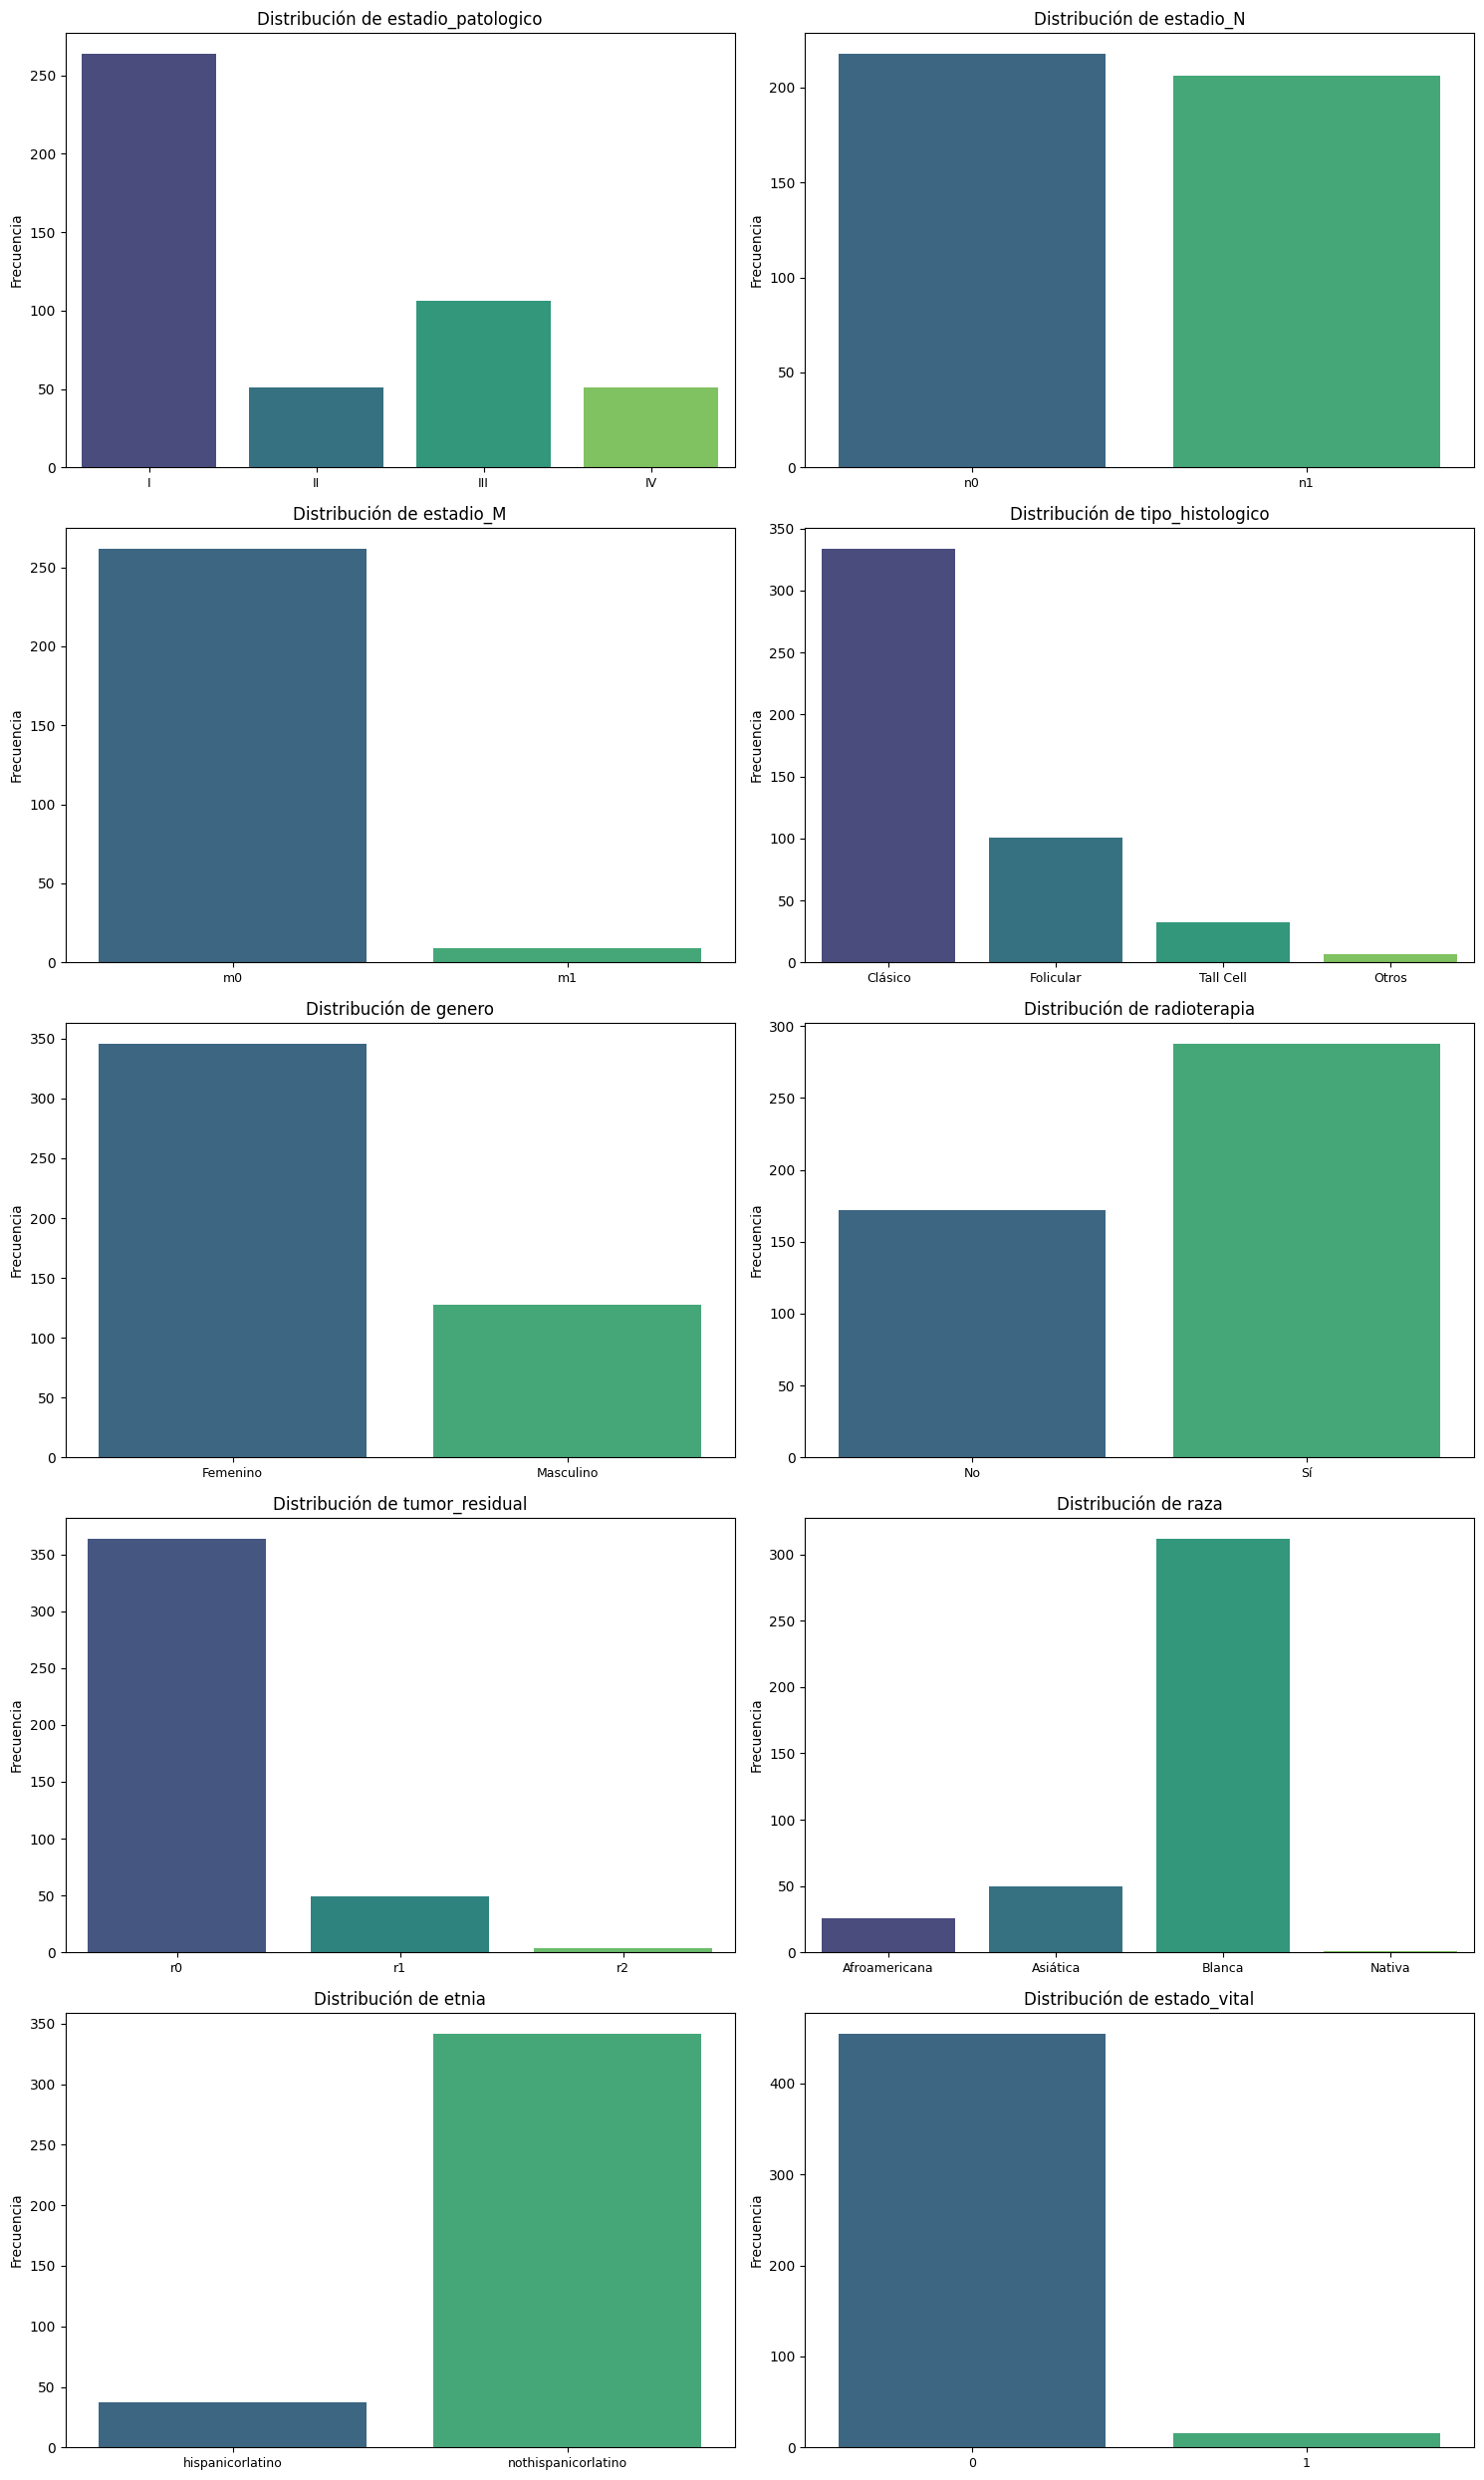

In [16]:
# Distribuciones de aquellas variables que sean categoricas:
orden_histologico = ['Clásico', 'Folicular', 'Tall Cell', 'Otros']

# Convertimos la columna a tipo Categorical con el orden establecido
df_clinical['tipo_histologico'] = pd.Categorical(
    df_clinical['tipo_histologico'], 
    categories=orden_histologico, 
    ordered=True)
columnas_cat = [col for col in df_clinical.columns if df_clinical[col].nunique() < 5]
pinta_distribucion_categoricas(df_clinical, columnas_cat)

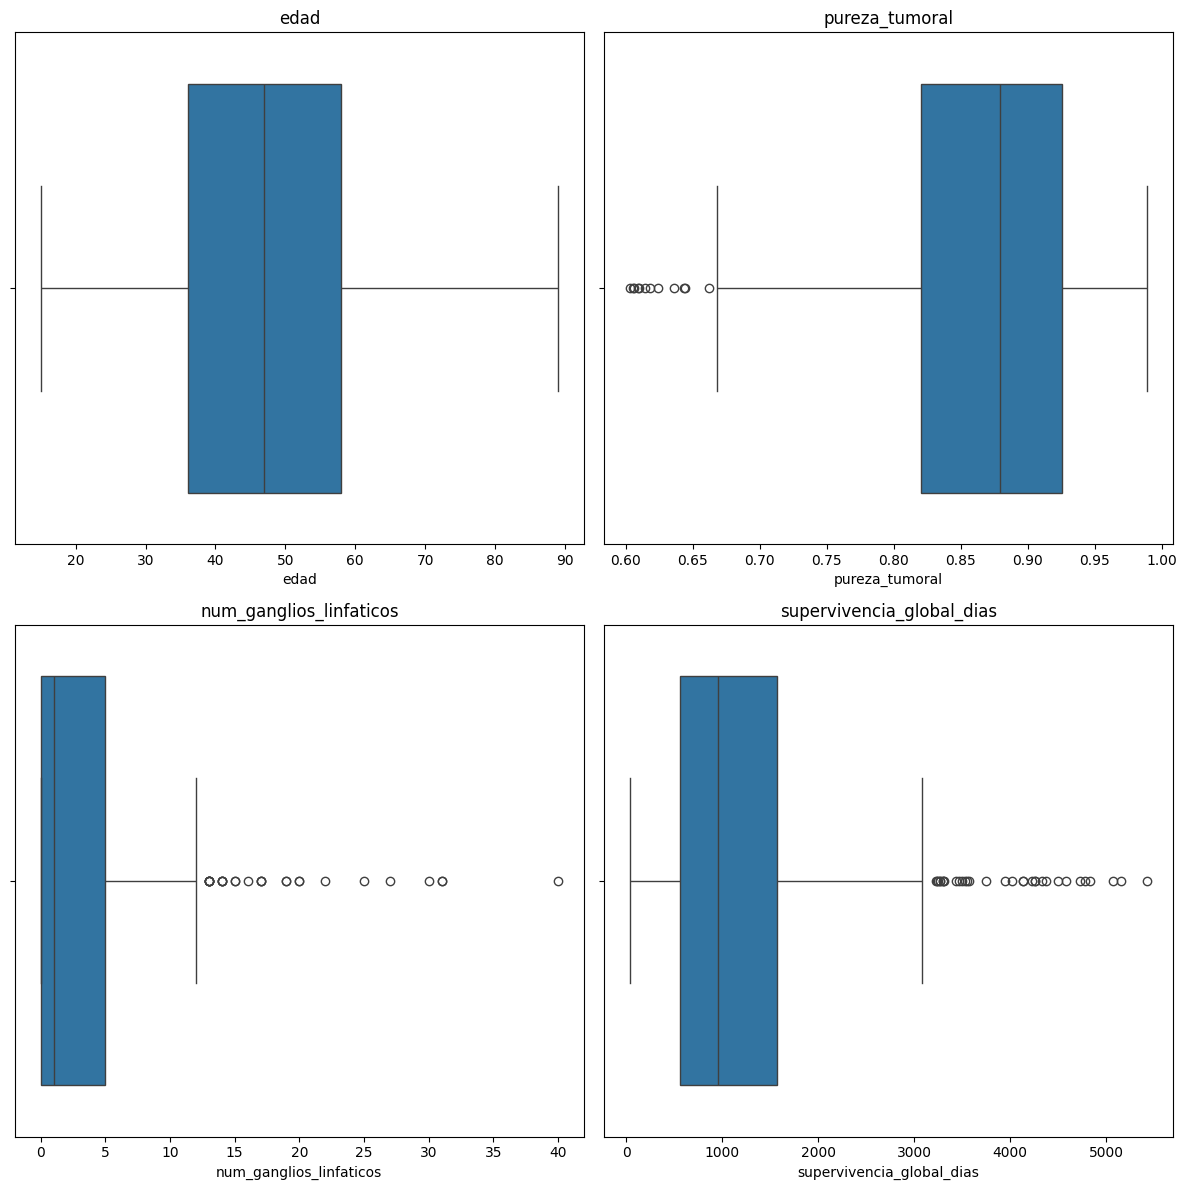

In [17]:
# Boxplot de aquellas variables que sean numéricas:
columnas_num = [col for col in df_clinical.columns if df_clinical[col].nunique() > 5]
plot_multiple_boxplots(df_clinical, columnas_num)

In [18]:
# Guardamos los outliers de supervivencia_global_dias aparte para su estudio posterior
Q1_s = df_clinical['supervivencia_global_dias'].quantile(0.25)
Q3_s = df_clinical['supervivencia_global_dias'].quantile(0.75)
IQR_s = Q3_s - Q1_s

umbral_superior_s = Q3_s + 1.5 * IQR_s
outliers_supervivencia = df_clinical[df_clinical['supervivencia_global_dias'] > umbral_superior_s]
print(f"Pacientes con supervivencia inusualmente larga: {len(outliers_supervivencia)}")

Pacientes con supervivencia inusualmente larga: 32


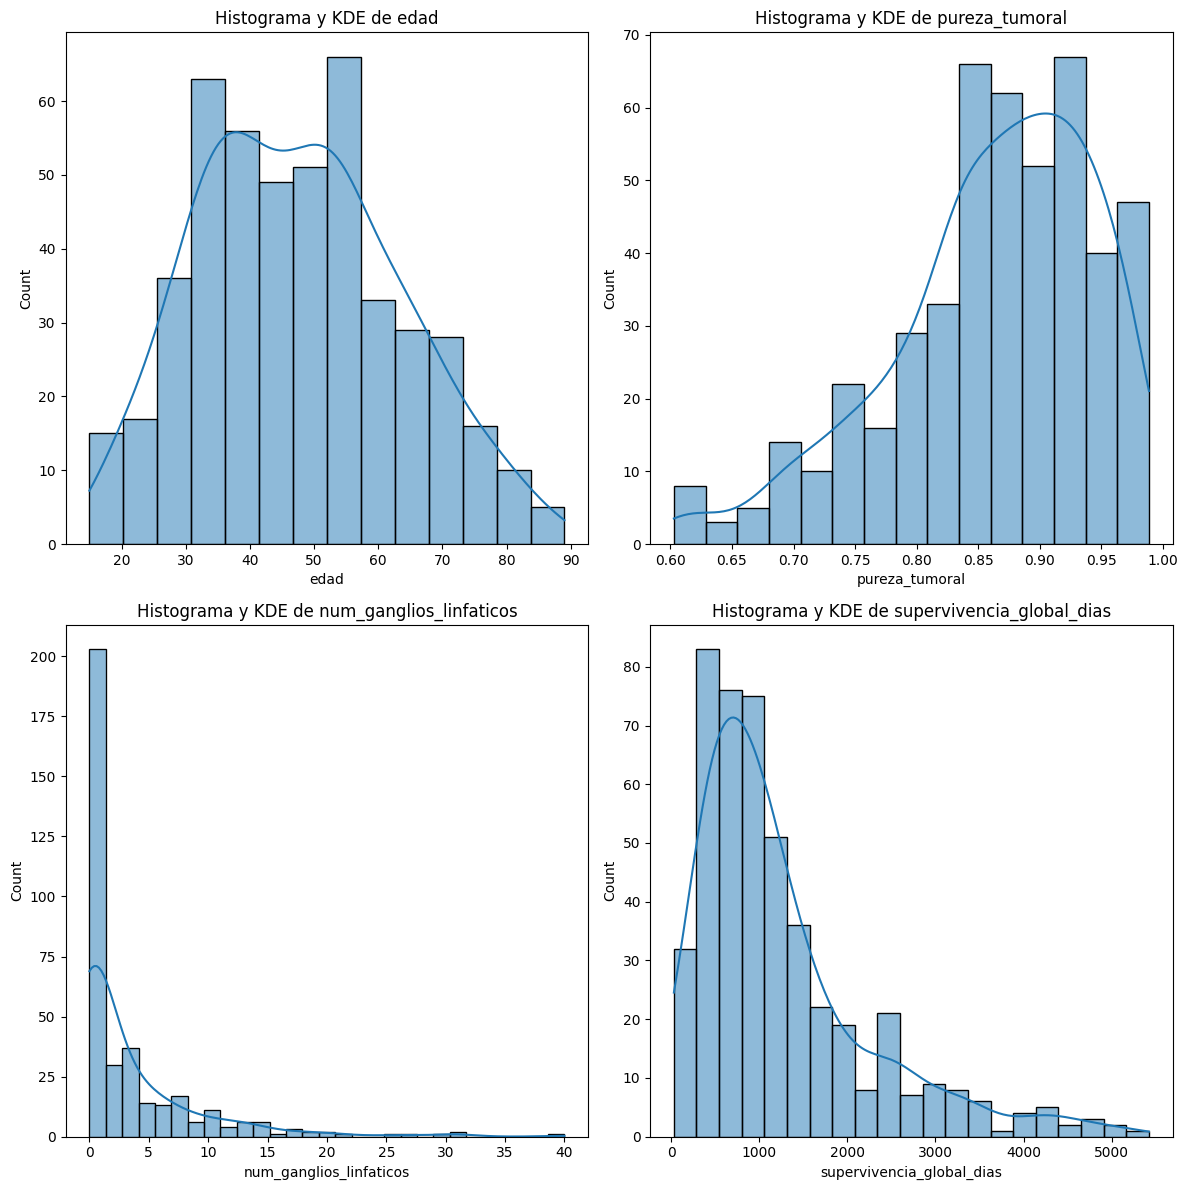

In [19]:
# Histogramas/Función densidad de las variables numéricas
plot_histo_den(df_clinical, columnas_num)

In [20]:
# Vamos a categorizar num_ganglios linfaticos, esta vez no diferenciamos entre outliers, sino que haremos una separacion:
def segmentar_ganglios(n):
    if pd.isna(n): return 'Desconocido'
    if n == 0: return '0 (Sin afectación)'
    if 0 < n <= 5: return '1-5 (Afectación Baja)'
    if n > 5: return '>5 (Enfermedad Agresiva)'
    return 'Desconocido'

df_clinical['perfil_ganglionar'] = df_clinical['num_ganglios_linfaticos'].apply(segmentar_ganglios)
df_clinical['perfil_ganglionar'] = pd.Categorical(
    df_clinical['perfil_ganglionar'], 
    categories=['0 (Sin afectación)', '1-5 (Afectación Baja)', '>5 (Enfermedad Agresiva)', 'Desconocido'],
    ordered=True
)
# Además, lo añadiremos a columnas_cat
columnas_cat.append(df_clinical['perfil_ganglionar'])

print("Distribución del Perfil Ganglionar:")
print(df_clinical['perfil_ganglionar'].value_counts().sort_index())

Distribución del Perfil Ganglionar:
perfil_ganglionar
0 (Sin afectación)          163
1-5 (Afectación Baja)       121
>5 (Enfermedad Agresiva)     78
Desconocido                 112
Name: count, dtype: int64


In [21]:
# Medidas de dispersión de variables numéricas:
df_clinical[columnas_num].describe()

attrib_name,edad,pureza_tumoral,num_ganglios_linfaticos,supervivencia_global_dias
count,474.0,474.0,362.0,471.0
mean,47.556962,0.861765,3.414365,1254.021231
std,15.748752,0.083276,5.666113,1007.334773
min,15.0,0.6028,0.0,32.0
25%,36.0,0.8205,0.0,556.0
50%,47.0,0.87955,1.0,955.0
75%,58.0,0.9253,5.0,1569.0
max,89.0,0.9888,40.0,5423.0


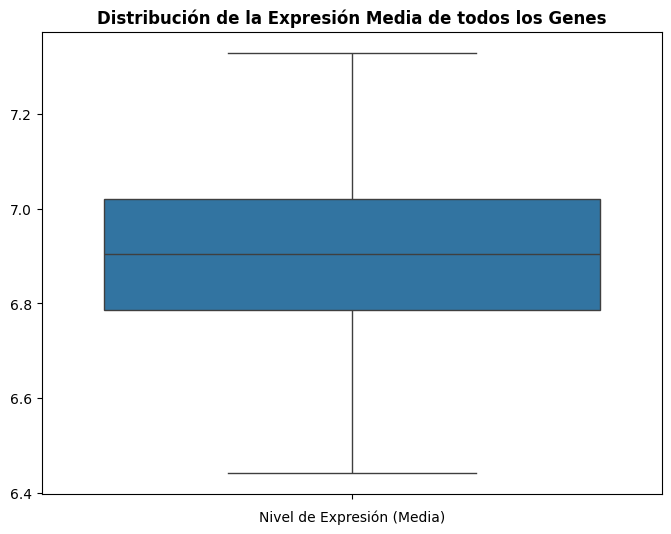

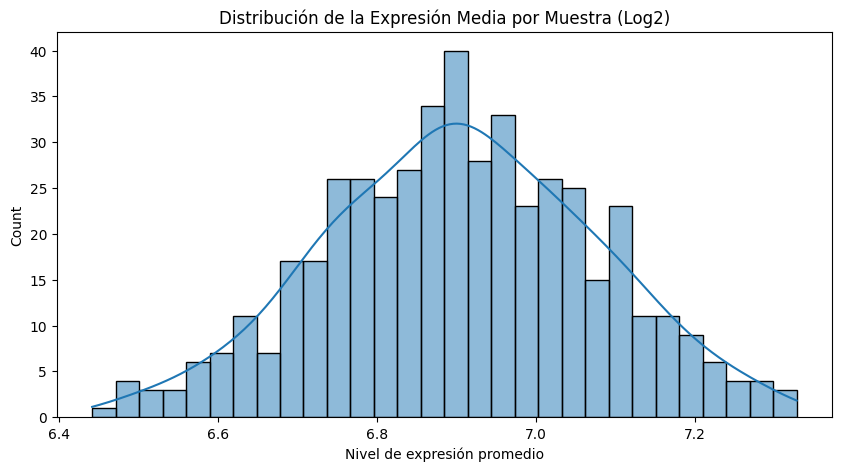

In [22]:
# PARA DF_RNA CON LOS DATOS DE EXPRESIÓN DE CADA GEN:
# No podemos ir gen a gen estudiando sus gráficas, asi que estudiaremos la expresion media de cada gen
expresion_media = df_rna.mean(axis=1)

plt.figure(figsize=(8, 6))
sns.boxplot(expresion_media)
plt.title('Distribución de la Expresión Media de todos los Genes', fontweight='bold')
plt.xlabel('Nivel de Expresión (Media)')
plt.show()

# Distribucion expresion media
plt.figure(figsize=(10, 5))
sns.histplot(expresion_media, kde=True, bins=30)
plt.title('Distribución de la Expresión Media por Muestra (Log2)')
plt.xlabel('Nivel de expresión promedio')
plt.show()


## ANÁLISIS BIVARIANTE

### Entre variables categóricas:

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


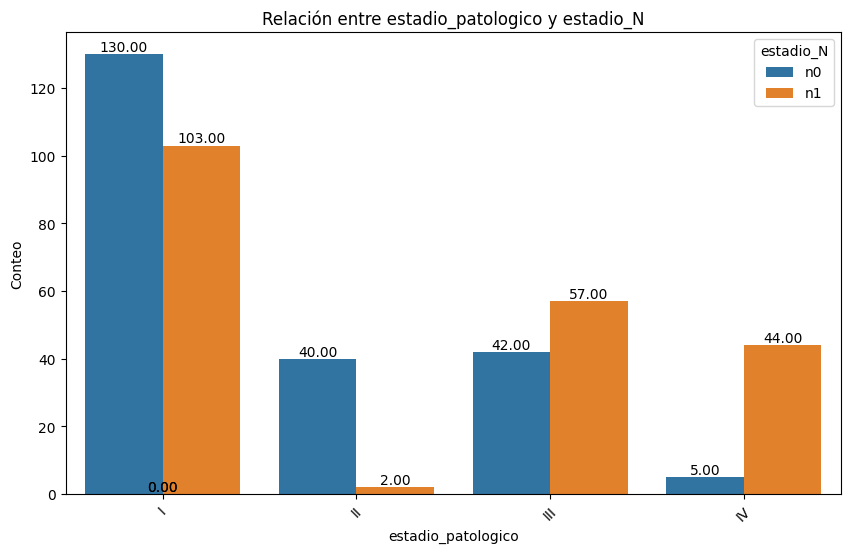

estadio_N            n0   n1
estadio_patologico          
I                   130  103
II                   40    2
III                  42   57
IV                    5   44
--- Análisis: estadio_patologico vs estadio_N ---
Valor Chi-Cuadrado: 70.58493210545709
P-Value: 3.1988942044728936e-15
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[119.52955083 113.47044917]
 [ 21.54609929  20.45390071]
 [ 50.78723404  48.21276596]
 [ 25.13711584  23.86288416]]


Resultado: SIGNIFICATIVO. Existe relación entre las variables.
----------------------------------------


np.float64(3.1988942044728936e-15)

In [54]:
# Comparación del Estadio con la afectación ganglionar (N)
orden_estadio = ['I', 'II', 'III', 'IV']

# Convertimos la columna a tipo Categorical con el orden establecido
df_clinical['estadio_patologico'] = pd.Categorical(
    df_clinical['estadio_patologico'], 
    categories=orden_estadio, 
    ordered=True)

plot_categorical_relationship_fin(df_clinical, 'estadio_patologico', 'estadio_N', show_values=True)
calcular_test_categorico(df_clinical, 'estadio_patologico', 'estadio_N')

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


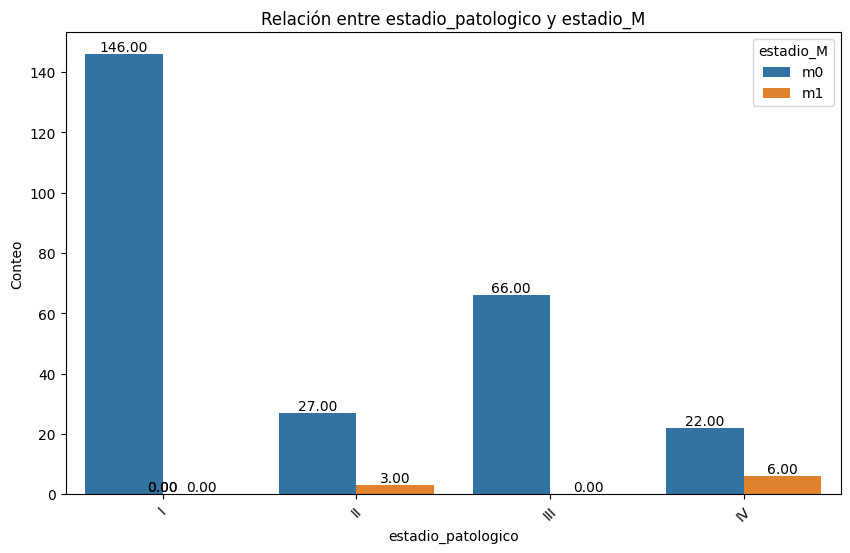

estadio_M            m0  m1
estadio_patologico         
I                   146   0
II                   27   3
III                  66   0
IV                   22   6
--- Análisis: estadio_patologico vs estadio_M ---
Valor Chi-Cuadrado: 39.90147783251231
P-Value: 1.1179964729476287e-08
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[141.13333333   4.86666667]
 [ 29.           1.        ]
 [ 63.8          2.2       ]
 [ 27.06666667   0.93333333]]


Resultado: SIGNIFICATIVO. Existe relación entre las variables.
----------------------------------------


np.float64(1.1179964729476287e-08)

In [72]:
# Comparación del Estadio con la presencia de metástasis (M)
plot_categorical_relationship_fin(df_clinical, 'estadio_patologico', 'estadio_M', show_values=True)
calcular_test_categorico(df_clinical, 'estadio_patologico', 'estadio_M')

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


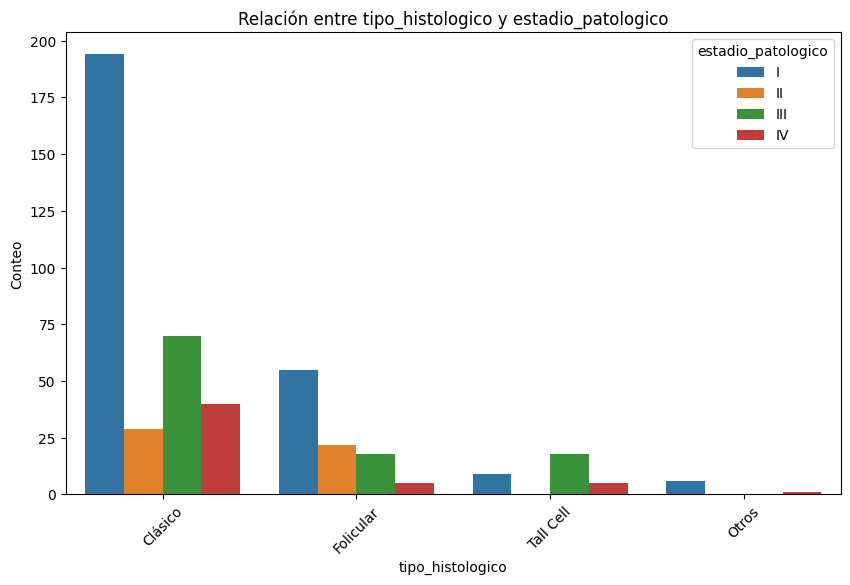

estadio_patologico    I  II  III  IV
tipo_histologico                    
Clásico             194  29   70  40
Folicular            55  22   18   5
Tall Cell             9   0   18   5
Otros                 6   0    0   1
--- Análisis: tipo_histologico vs estadio_patologico ---
Valor Chi-Cuadrado: 46.4072546851917
P-Value: 5.05938131102029e-07
Grados de Libertad: 9
Tabla de Frecuencias Esperadas:
 [[186.25423729  35.9809322   74.78389831  35.9809322 ]
 [ 55.93220339  10.80508475  22.45762712  10.80508475]
 [ 17.89830508   3.45762712   7.18644068   3.45762712]
 [  3.91525424   0.75635593   1.5720339    0.75635593]]


Resultado: SIGNIFICATIVO. Existe relación entre las variables.
----------------------------------------


np.float64(5.05938131102029e-07)

In [ ]:
# Relación entre tipo_histológico y estadio
# Definimos el orden deseado, dejando 'Otros' al final
orden_histologico = ['Clásico', 'Folicular', 'Tall Cell', 'Otros']

# Convertimos la columna a tipo Categorical con el orden establecido
df_clinical['tipo_histologico'] = pd.Categorical(
    df_clinical['tipo_histologico'], 
    categories=orden_histologico, 
    ordered=True)
    
plot_categorical_relationship_fin(df_clinical, 'tipo_histologico', 'estadio_patologico', relative_freq=True)
calcular_test_categorico(df_clinical, 'tipo_histologico', 'estadio_patologico')

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


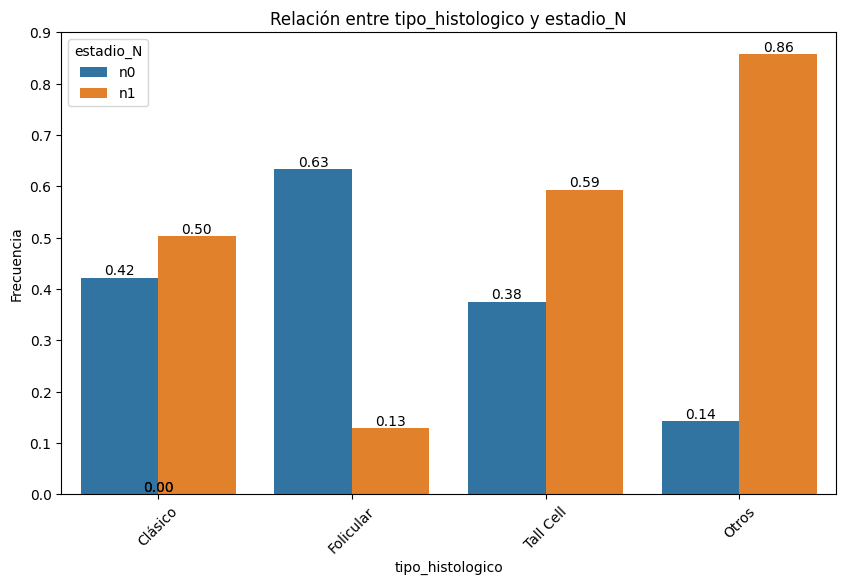

estadio_N          n0   n1
tipo_histologico          
Clásico           141  168
Folicular          64   13
Tall Cell          12   19
Otros               1    6
--- Análisis: tipo_histologico vs estadio_N ---
Valor Chi-Cuadrado: 40.98372300221456
P-Value: 6.591389954382205e-09
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[158.87264151 150.12735849]
 [ 39.58962264  37.41037736]
 [ 15.93867925  15.06132075]
 [  3.5990566    3.4009434 ]]


Resultado: SIGNIFICATIVO. Existe relación entre las variables.
----------------------------------------


np.float64(6.591389954382205e-09)

In [76]:
# ¿Ciertas variantes histológicas tienen más tendencia a la diseminación ganglionar?
plot_categorical_relationship_fin(df_clinical, 'tipo_histologico', 'estadio_N', show_values=True,  relative_freq=True)
calcular_test_categorico(df_clinical, 'tipo_histologico', 'estadio_N')

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


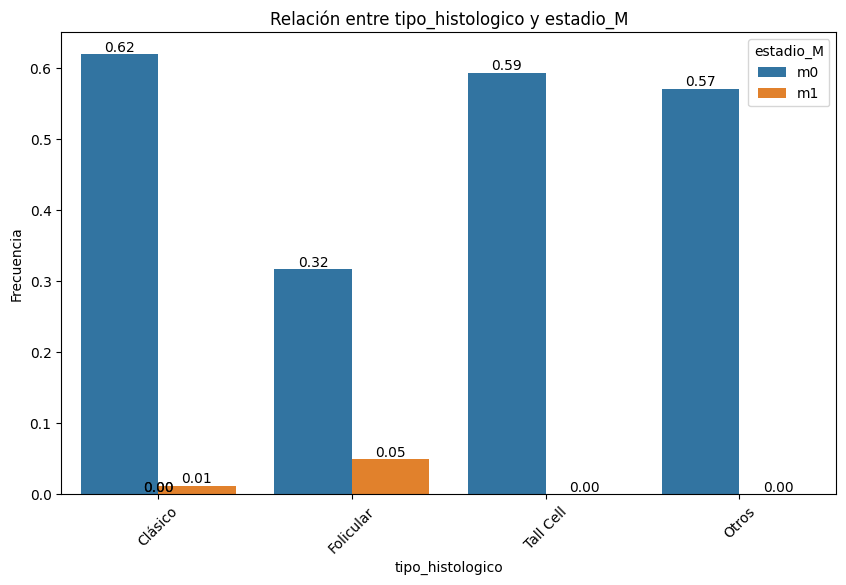

estadio_M          m0  m1
tipo_histologico         
Clásico           207   4
Folicular          32   5
Tall Cell          19   0
Otros               4   0
--- Análisis: tipo_histologico vs estadio_M ---
Valor Chi-Cuadrado: 14.096812162547845
P-Value: 0.002776293096250784
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[2.03992620e+02 7.00738007e+00]
 [3.57712177e+01 1.22878229e+00]
 [1.83690037e+01 6.30996310e-01]
 [3.86715867e+00 1.32841328e-01]]


Resultado: SIGNIFICATIVO. Existe relación entre las variables.
----------------------------------------


np.float64(0.002776293096250784)

In [77]:
# ¿Ciertas variantes histológicas tienen más tendencia a la metástasis?
plot_categorical_relationship_fin(df_clinical, 'tipo_histologico', 'estadio_M', show_values=True, relative_freq=True )
calcular_test_categorico(df_clinical, 'tipo_histologico', 'estadio_M')

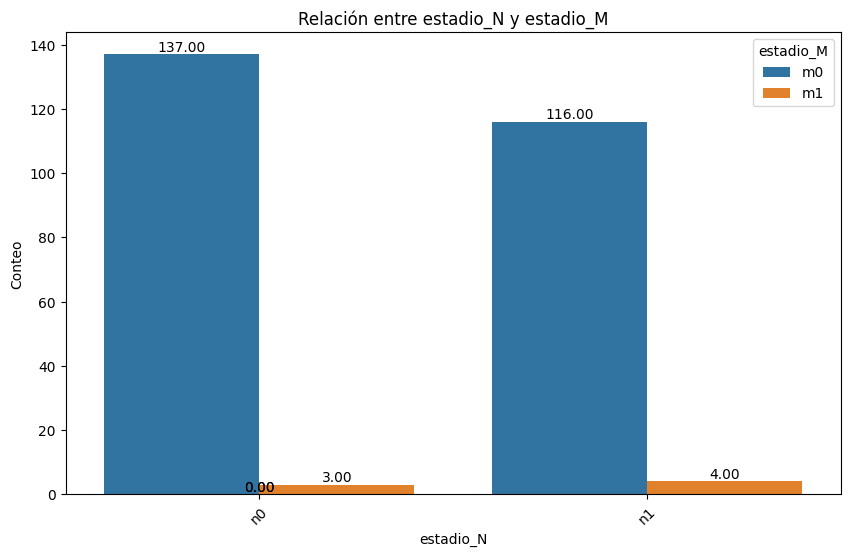

estadio_M   m0  m1
estadio_N         
n0         137   3
n1         116   4
--- Análisis: estadio_N vs estadio_M ---
Valor Chi-Cuadrado: 0.04281949934123849
P-Value: 0.836065518711961
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[136.23076923   3.76923077]
 [116.76923077   3.23076923]]


Resultado: No significativo.
----------------------------------------


np.float64(0.836065518711961)

In [28]:
# ¿La diseminación linfatica siempre precede la metastásica?
plot_categorical_relationship_fin(df_clinical, 'estadio_N', 'estadio_M', show_values=True)
calcular_test_categorico(df_clinical, 'estadio_N', 'estadio_M')

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


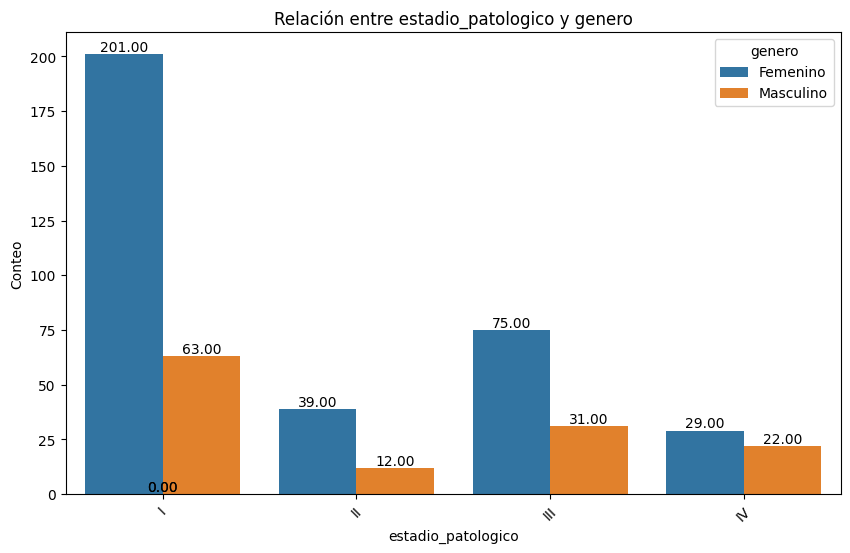

genero              Femenino  Masculino
estadio_patologico                     
I                        201         63
II                        39         12
III                       75         31
IV                        29         22
--- Análisis: estadio_patologico vs genero ---
Valor Chi-Cuadrado: 8.611375355245015
P-Value: 0.034929993605684606
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[192.40677966  71.59322034]
 [ 37.16949153  13.83050847]
 [ 77.25423729  28.74576271]
 [ 37.16949153  13.83050847]]


Resultado: SIGNIFICATIVO. Existe relación entre las variables.
----------------------------------------


np.float64(0.034929993605684606)

In [29]:
# ¿Afecta el género?
plot_categorical_relationship_fin(df_clinical, 'estadio_patologico', 'genero', show_values=True)
calcular_test_categorico(df_clinical, 'estadio_patologico', 'genero')

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


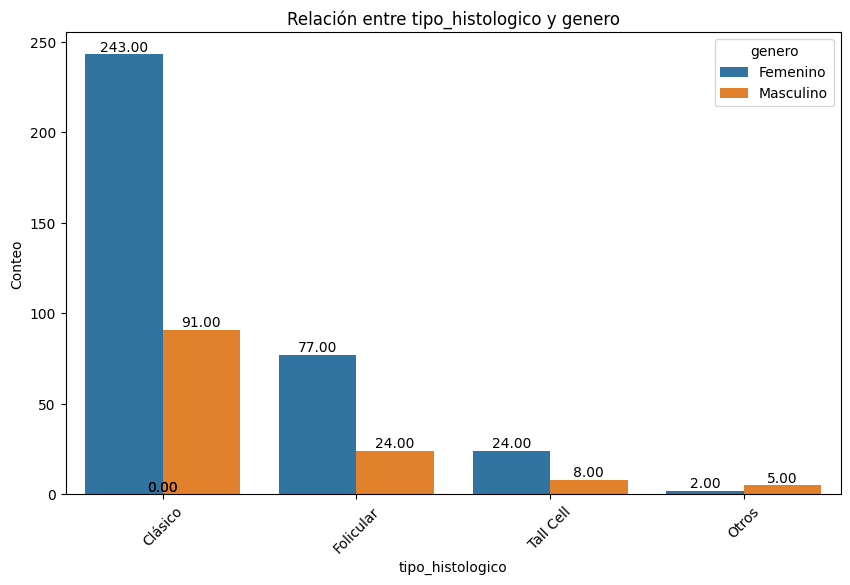

genero            Femenino  Masculino
tipo_histologico                     
Clásico                243         91
Folicular               77         24
Tall Cell               24          8
Otros                    2          5
--- Análisis: tipo_histologico vs genero ---
Valor Chi-Cuadrado: 7.621832965438134
P-Value: 0.054509306399142504
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[243.80590717  90.19409283]
 [ 73.7257384   27.2742616 ]
 [ 23.35864979   8.64135021]
 [  5.10970464   1.89029536]]


Resultado: No significativo.
----------------------------------------


np.float64(0.054509306399142504)

In [30]:
plot_categorical_relationship_fin(df_clinical, 'tipo_histologico', 'genero', show_values=True)
calcular_test_categorico(df_clinical, 'tipo_histologico', 'genero')

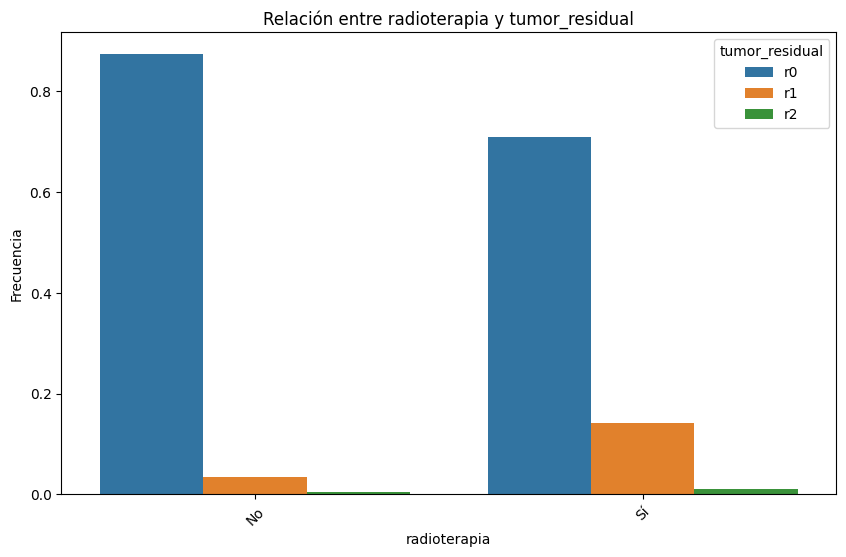

tumor_residual   r0  r1  r2
radioterapia               
No              150   6   1
Sí              204  41   3
--- Análisis: radioterapia vs tumor_residual ---
Valor Chi-Cuadrado: 15.644011116266062
P-Value: 0.00040081701434541107
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[137.22962963  18.21975309   1.55061728]
 [216.77037037  28.78024691   2.44938272]]


Resultado: SIGNIFICATIVO. Existe relación entre las variables.
----------------------------------------


np.float64(0.00040081701434541107)

In [31]:
# Relación entre radioterapia y tumor residual
plot_categorical_relationship_fin(df_clinical, 'radioterapia', 'tumor_residual', relative_freq=True)
calcular_test_categorico(df_clinical, 'radioterapia', 'tumor_residual')

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


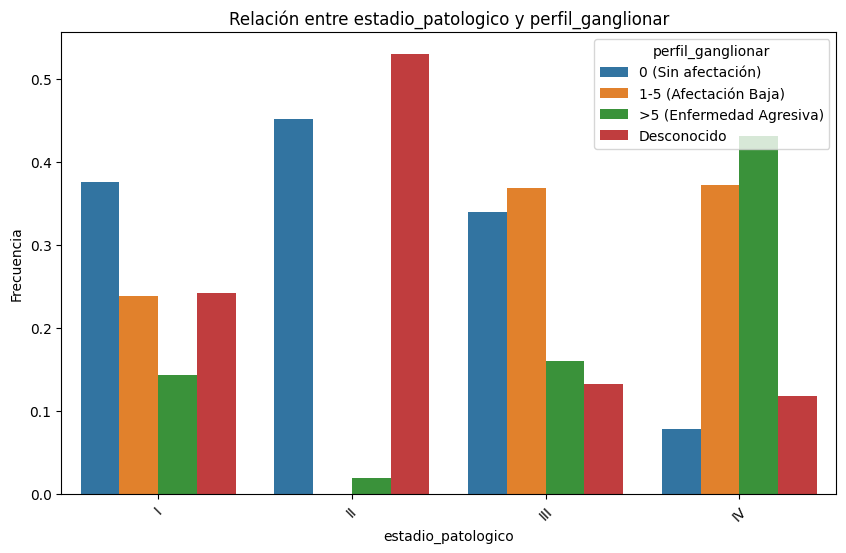

perfil_ganglionar   0 (Sin afectación)  1-5 (Afectación Baja)  \
estadio_patologico                                              
I                                   99                     63   
II                                  23                      0   
III                                 36                     39   
IV                                   4                     19   

perfil_ganglionar   >5 (Enfermedad Agresiva)  Desconocido  
estadio_patologico                                         
I                                         38           64  
II                                         1           27  
III                                       17           14  
IV                                        22            6  
--- Análisis: estadio_patologico vs perfil_ganglionar ---
Valor Chi-Cuadrado: 89.91918616160378
P-Value: 1.690003216997421e-15
Grados de Libertad: 9
Tabla de Frecuencias Esperadas:
 [[90.61016949 67.6779661  43.62711864 62.08474576]
 [17.50423729 13

np.float64(1.690003216997421e-15)

In [81]:
# Perfil ganglionar vs estadio patologico
plot_categorical_relationship_fin(df_clinical, 'estadio_patologico', 'perfil_ganglionar', relative_freq=True)
calcular_test_categorico(df_clinical, 'estadio_patologico', 'perfil_ganglionar')

C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


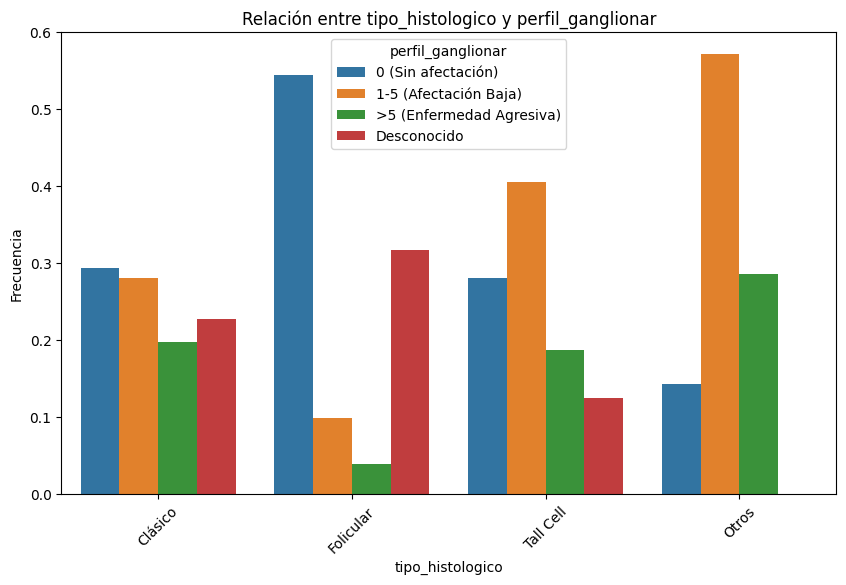

perfil_ganglionar  0 (Sin afectación)  1-5 (Afectación Baja)  \
tipo_histologico                                               
Clásico                            98                     94   
Folicular                          55                     10   
Tall Cell                           9                     13   
Otros                               1                      4   

perfil_ganglionar  >5 (Enfermedad Agresiva)  Desconocido  
tipo_histologico                                          
Clásico                                  66           76  
Folicular                                 4           32  
Tall Cell                                 6            4  
Otros                                     2            0  
--- Análisis: tipo_histologico vs perfil_ganglionar ---
Valor Chi-Cuadrado: 50.38273975686676
P-Value: 9.12651223107631e-08
Grados de Libertad: 9
Tabla de Frecuencias Esperadas:
 [[114.85654008  85.26160338  54.96202532  78.91983122]
 [ 34.73206751  25.78270042

np.float64(9.12651223107631e-08)

In [79]:
# Perfil ganglionar vs tipo histologico
plot_categorical_relationship_fin(df_clinical, 'tipo_histologico', 'perfil_ganglionar', relative_freq=True)
calcular_test_categorico(df_clinical, 'tipo_histologico', 'perfil_ganglionar')

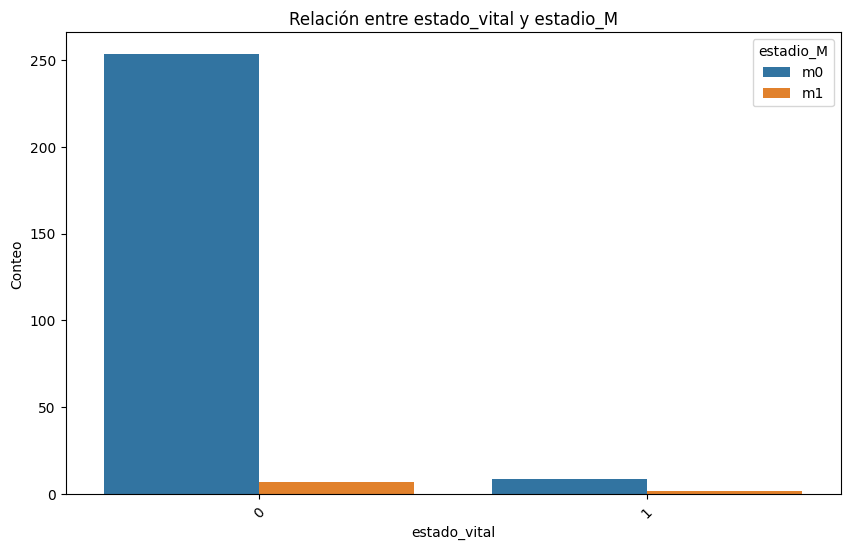

estadio_M      m0  m1
estado_vital         
0             253   7
1               9   2
--- Análisis: estado_vital vs estadio_M ---
Valor Chi-Cuadrado: 3.7997033977472907
P-Value: 0.05126166260705026
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[251.36531365   8.63468635]
 [ 10.63468635   0.36531365]]


Resultado: No significativo.
----------------------------------------


np.float64(0.05126166260705026)

In [50]:
# Perfil ganglionar vs tipo histologico
plot_categorical_relationship_fin(df_clinical, 'estado_vital', 'estadio_M', relative_freq=False)
calcular_test_categorico(df_clinical, 'estado_vital', 'estadio_M')

### Variable categórica y numérica

**Hacer cálculos estadísticos para mostrar la significancia de los resultados

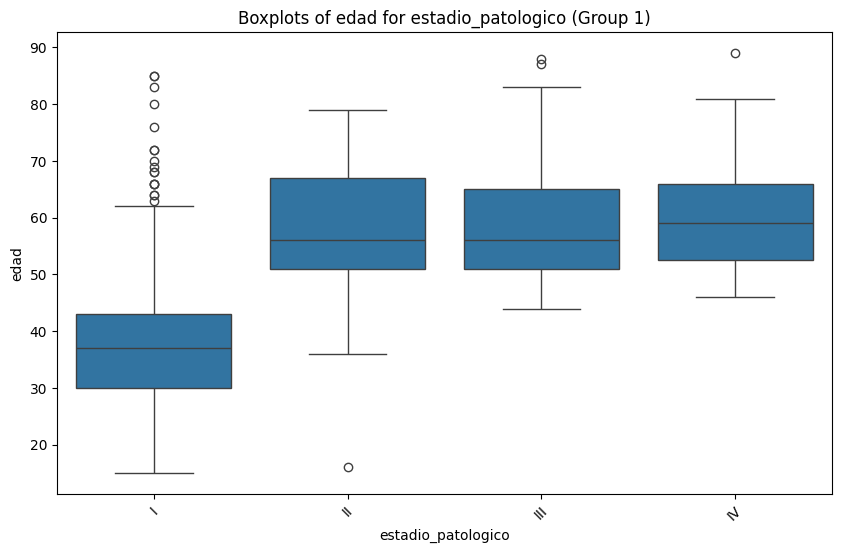

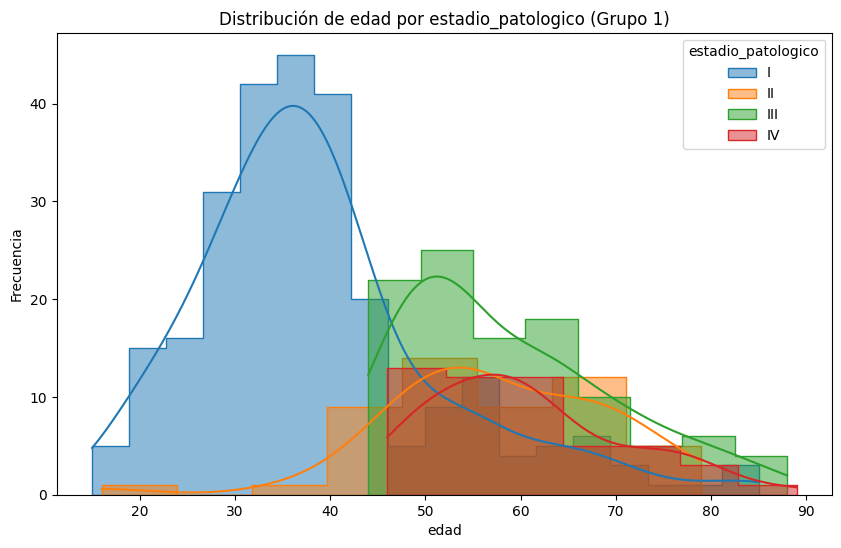

--- Test de Kruskal-Wallis: edad vs estadio_patologico ---
Estadístico: 217.0225
P-valor: 8.84e-47
Resultado: SIGNIFICATIVO. Existen diferencias importantes entre los grupos.
--------------------------------------------------
---------------COMPARACIÓN TRAS AGRUPACIÓN:-----------------


C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = [datos[col_num].values for nombre, datos in df_clean.groupby(col_cat)]


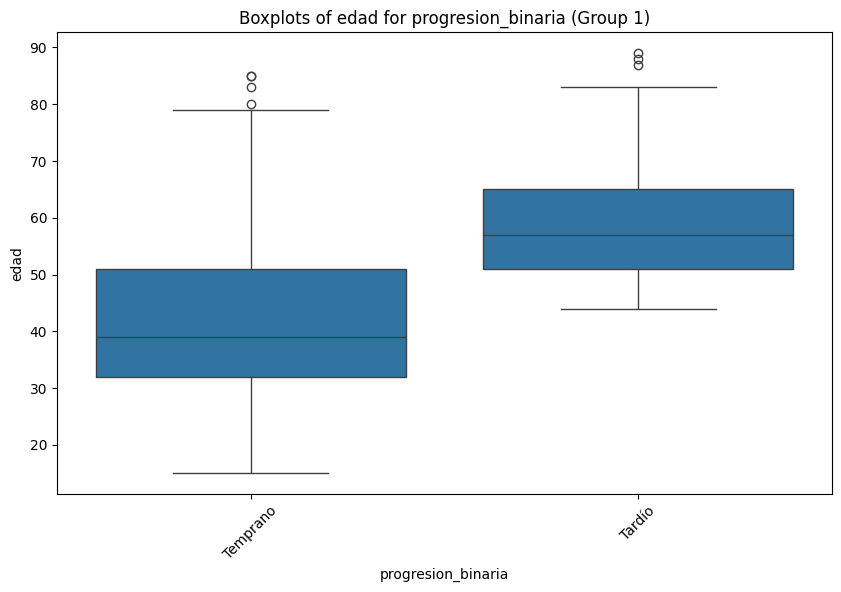

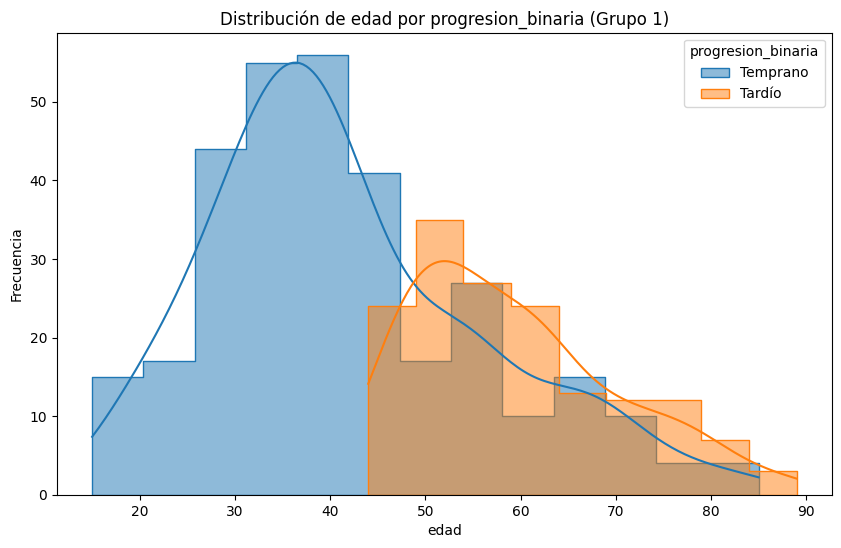

--- Test de Kruskal-Wallis: edad vs progresion_binaria ---
Estadístico: 144.3716
P-valor: 2.95e-33
Resultado: SIGNIFICATIVO. Existen diferencias importantes entre los grupos.
--------------------------------------------------


C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = [datos[col_num].values for nombre, datos in df_clean.groupby(col_cat)]


np.float64(2.9467397627730602e-33)

In [34]:
# ¿Son los pacientes de estadios avanzados significativamente mayores?
plot_grouped_boxplots(df_clinical, 'estadio_patologico', 'edad')
plot_grouped_histograms(df_clinical, cat_col="estadio_patologico",num_col="edad", group_size= 4)
calcular_p_valor_kruskal(df_clinical, 'edad', 'estadio_patologico')



#Vamos a clasificar los estadios en temprano (I y II) y tardio (III y IV) y volvemos a realizar lo mismo:
df_clinical['progresion_binaria'] = df_clinical['estadio_patologico'].map({
    'I': 'Temprano', 
    'II': 'Temprano', 
    'III': 'Tardío', 
    'IV': 'Tardío'
})
df_clinical['progresion_binaria'] = pd.Categorical(
    df_clinical['progresion_binaria'], 
    categories=['Temprano', 'Tardío'], 
    ordered=True
)
print("---------------COMPARACIÓN TRAS AGRUPACIÓN:-----------------")
plot_grouped_boxplots(df_clinical, 'progresion_binaria', 'edad')
plot_grouped_histograms(df_clinical, 'progresion_binaria', 'edad', group_size=2)
calcular_p_valor_kruskal(df_clinical, 'edad', 'progresion_binaria')

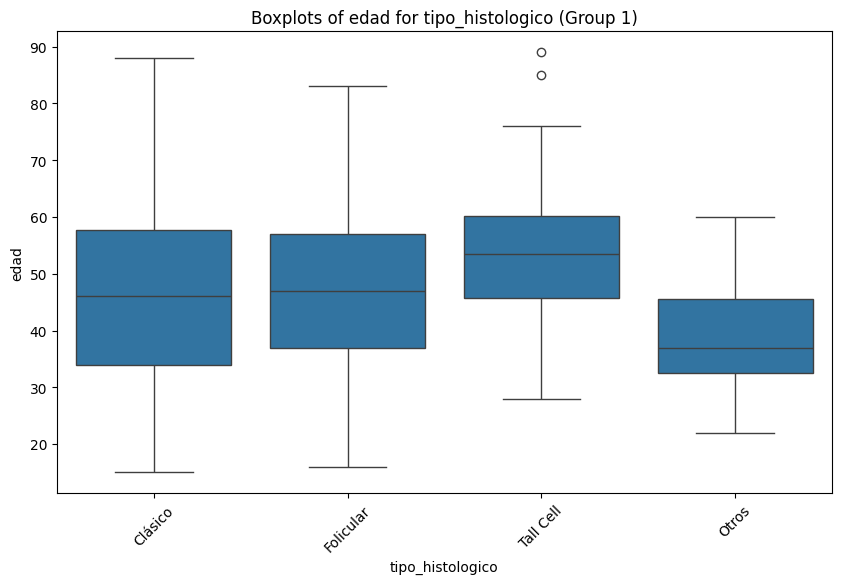

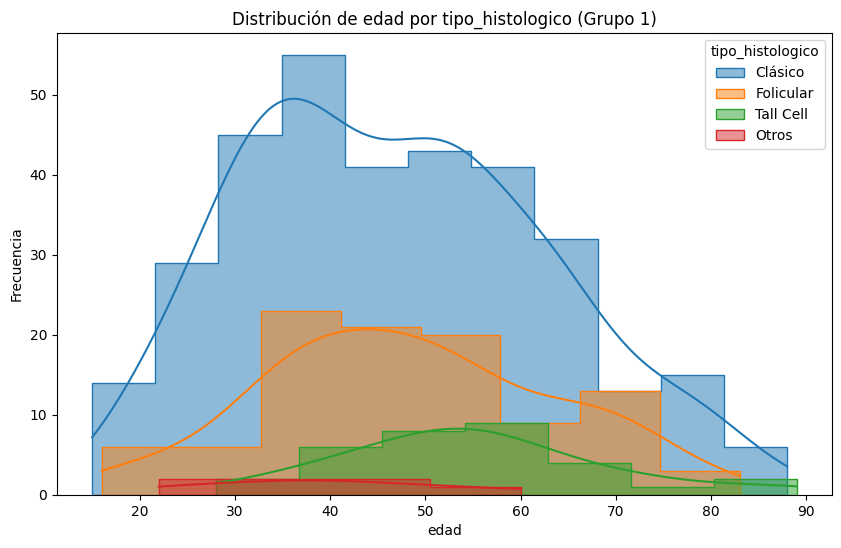

--- Test de Kruskal-Wallis: edad vs tipo_histologico ---
Estadístico: 10.6804
P-valor: 1.36e-02
Resultado: SIGNIFICATIVO. Existen diferencias importantes entre los grupos.
--------------------------------------------------


C:\Users\mbarr\AppData\Local\Temp\ipykernel_28600\2378159980.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = [datos[col_num].values for nombre, datos in df_clean.groupby(col_cat)]


np.float64(0.013586024768136463)

In [35]:
# ¿Influye la edad en la agresividad del tipo histológico?
plot_grouped_boxplots(df_clinical, 'tipo_histologico', 'edad')
plot_grouped_histograms(df_clinical, cat_col="tipo_histologico",num_col="edad", group_size= 4)
calcular_p_valor_kruskal(df_clinical, 'edad', 'tipo_histologico')

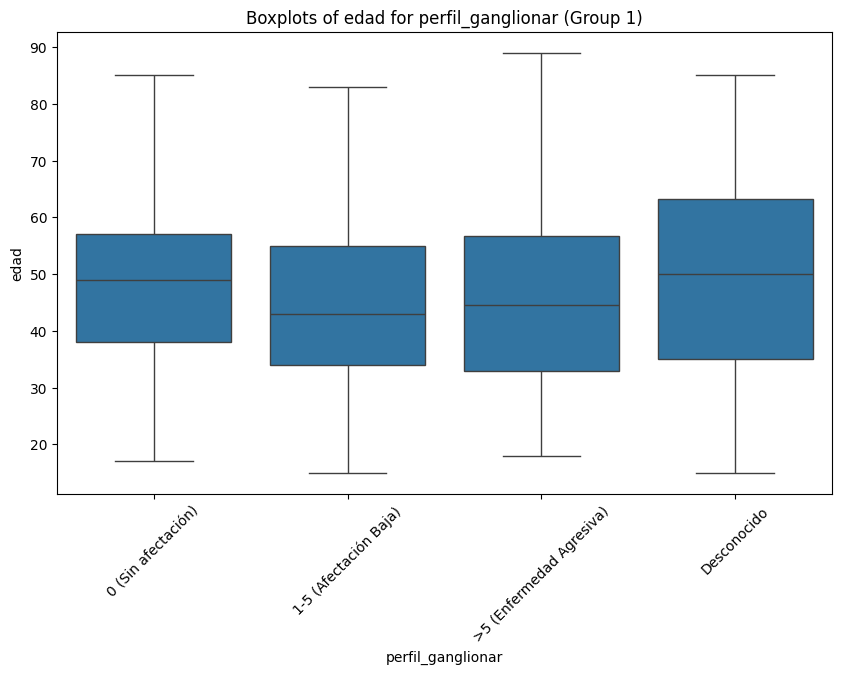

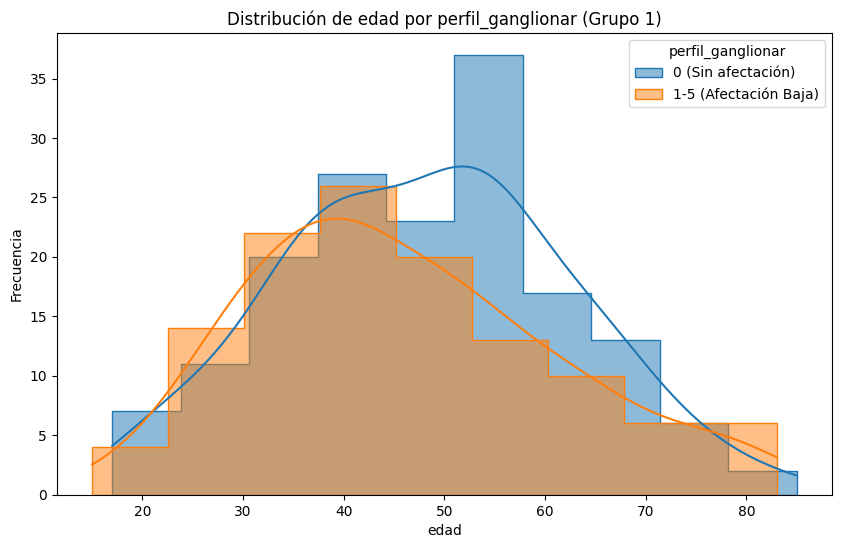

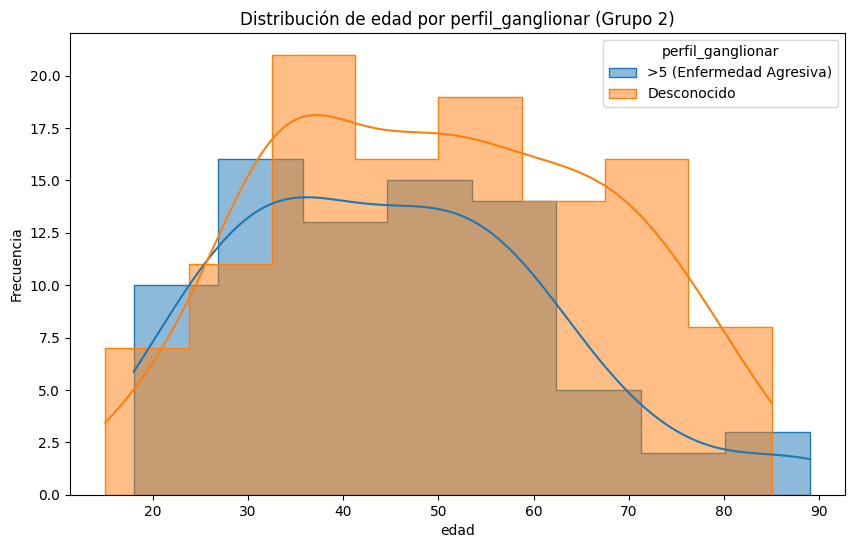

--- Test de Kruskal-Wallis: perfil_ganglionar vs edad ---
Estadístico: 71.5401
P-valor: 4.93e-01
Resultado: No significativo.
--------------------------------------------------


np.float64(0.493131784917251)

In [36]:
# Numero de ganglios vs edad
plot_grouped_boxplots(df_clinical, 'perfil_ganglionar', 'edad')
plot_grouped_histograms(df_clinical, cat_col="perfil_ganglionar",num_col="edad", group_size= 2)
calcular_p_valor_kruskal(df_clinical, 'perfil_ganglionar', 'edad')

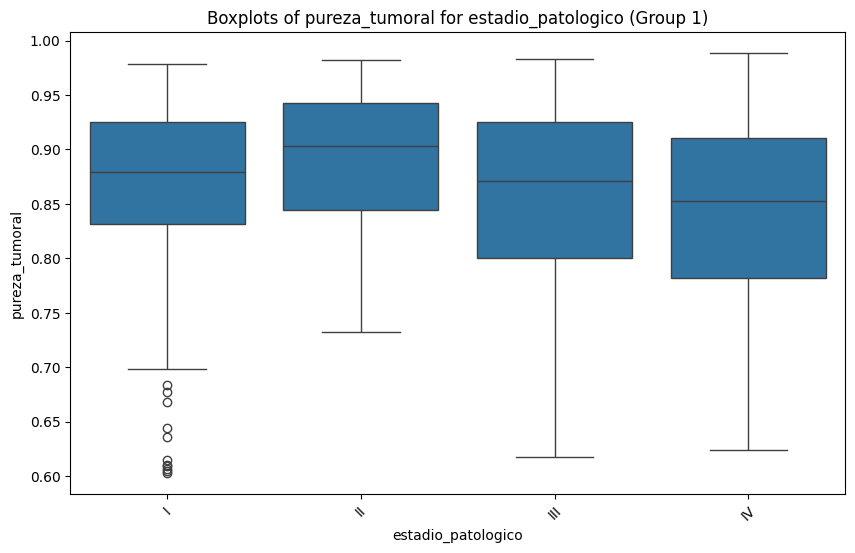

--- Test de Kruskal-Wallis: estadio_patologico vs pureza_tumoral ---
Estadístico: 351.3486
P-valor: 4.55e-01
Resultado: No significativo.
--------------------------------------------------


np.float64(0.45464992020322037)

In [37]:
# ¿Baja la pureza tumoral conforme avanza el estadio patológico?
plot_grouped_boxplots(df_clinical, 'estadio_patologico', 'pureza_tumoral')
calcular_p_valor_kruskal(df_clinical, 'estadio_patologico', 'pureza_tumoral')

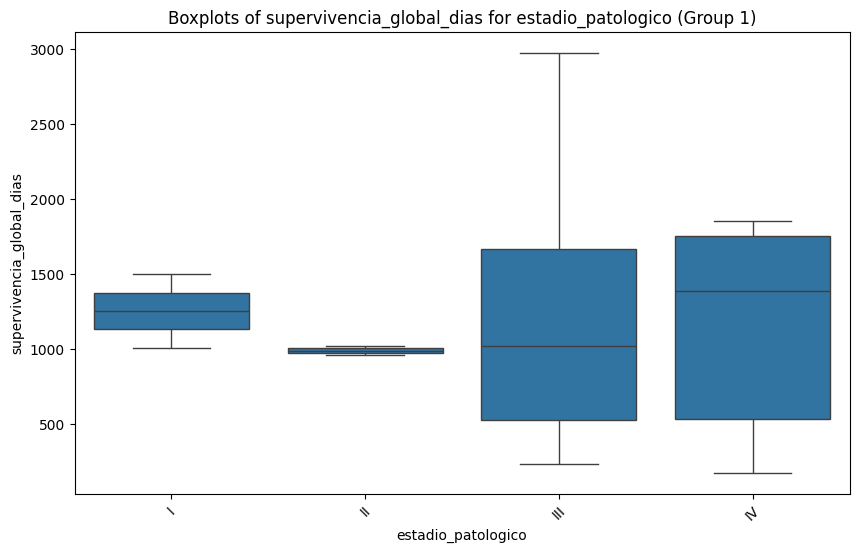

--- Test de Kruskal-Wallis: estadio_patologico vs supervivencia_global_dias ---
Estadístico: 416.2903
P-valor: 5.14e-01
Resultado: No significativo.
--------------------------------------------------


np.float64(0.5144162002407148)

In [38]:
# Filtramos solo pacientes fallecidos para analizar su tiempo de vida real
df_fallecidos = df_clinical[df_clinical['estado_vital'] == 1]

#¿existe una reducción significativa del tiempo de supervivencia conforme aumenta el estadio?
plot_grouped_boxplots(df_fallecidos, 'estadio_patologico', 'supervivencia_global_dias')
calcular_p_valor_kruskal(df_clinical, 'estadio_patologico', 'supervivencia_global_dias')

# Análisis multivariante

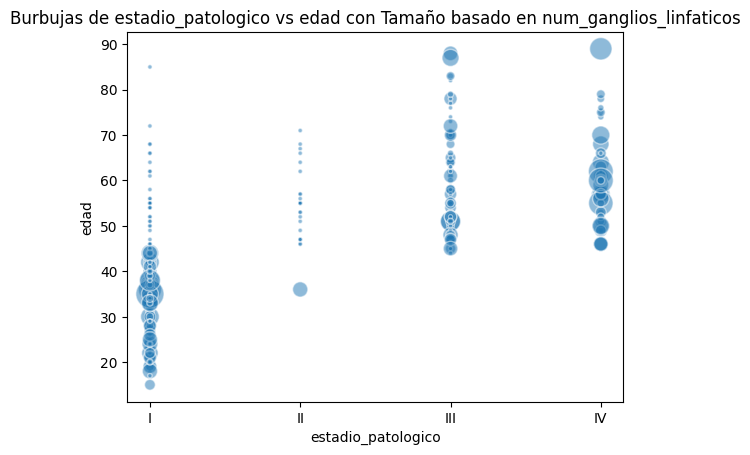

In [ ]:
# Cómo afecta la edad a la categorización de pacientes en estadio patológico en función de la diseminación del tumor a los gánglios
# Limpieza y creación de una copia real para evitar avisos
df_final = df_combined.dropna(subset=['estadio_patologico', 'num_ganglios_linfaticos', 'edad']).copy()

# Forzar el orden en este nuevo dataframe
orden_estadios = ['I', 'II', 'III', 'IV']
df_final.loc[:, 'estadio_patologico'] = pd.Categorical(
    df_final['estadio_patologico'], 
    categories=orden_estadios, 
    ordered=True
)

# Lanzar el gráfico con una escala que haga las burbujas visibles
bubble_plot(df_final.sort_values('estadio_patologico'), 
            'estadio_patologico', 'edad', 'num_ganglios_linfaticos', scale=0.1)

In [39]:
# 1. Separar los datos de expresión por grupo de estadio
early_exp = df_rna.loc[df_combined[df_clinical['progresion_binaria'] == 'Temprano'].index]
late_exp = df_rna.loc[df_combined[df_clinical['progresion_binaria'] == 'Tardío'].index]

# 2. Calcular Log2 Fold Change y P-valor para cada gen
results = []
for gen in df_rna.columns:
    # Media del grupo avanzado - Media del grupo temprano (en log2 es una resta)
    log2FC = late_exp[gen].mean() - early_exp[gen].mean()
    
    # Test t para ver si la diferencia es significativa
    t_stat, p_val = ttest_ind(late_exp[gen], early_exp[gen], nan_policy='omit')
    
    results.append({'gen': gen, 'log2FC': log2FC, 'pvalue': p_val})

df_volcano = pd.DataFrame(results)

# 3. Transformar p-valor a -log10 para el eje Y
df_volcano['neg_log10_p'] = -np.log10(df_volcano['pvalue'])

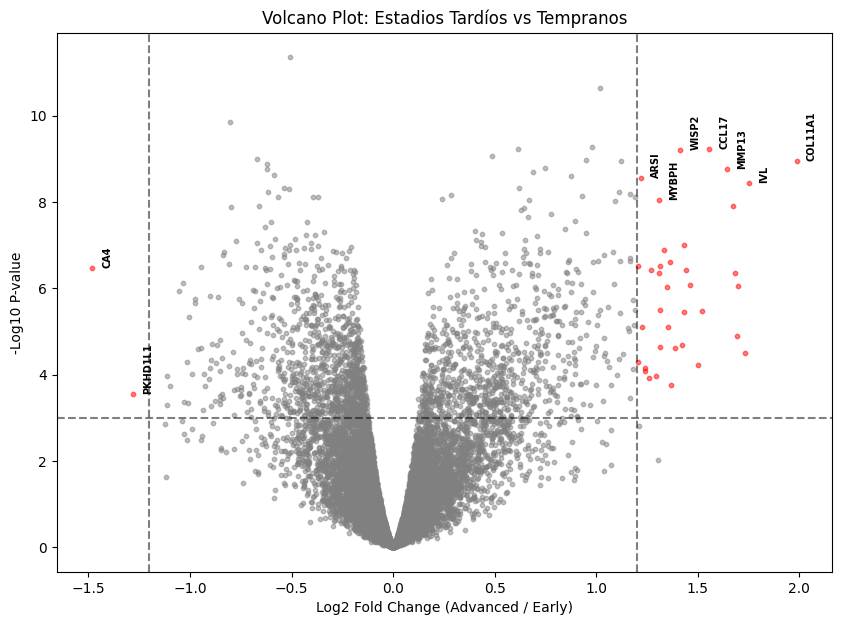

In [40]:
plt.figure(figsize=(10, 7))
# Definir umbrales (Significancia: p < 0.05 | Magnitud: |log2FC| > 1)
p_threshold = -np.log10(0.001)
fc_threshold = 1.2

# Colorear según significancia
for i, row in df_volcano.iterrows():
    if row['neg_log10_p'] > p_threshold and abs(row['log2FC']) > fc_threshold:
        color = 'red' # Genes significativos y con gran cambio
        if row['neg_log10_p']>8 or row['log2FC']<0:
            plt.text(
            row['log2FC'] + 0.05, # Desplazamiento en X para que no pise el punto
            row['neg_log10_p'] + 0.05, # Desplazamiento en Y
            row['gen'], 
            rotation=90,        
            fontsize=7, 
            fontweight='semibold')
    else:
        color = 'grey' # Genes no interesantes
    plt.scatter(row['log2FC'], row['neg_log10_p'], color=color, alpha=0.5, s=10)

plt.axhline(y=p_threshold, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=fc_threshold, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=-fc_threshold, color='black', linestyle='--', alpha=0.5)

plt.title('Volcano Plot: Estadios Tardíos vs Tempranos')
plt.xlabel('Log2 Fold Change (Advanced / Early)')
plt.ylabel('-Log10 P-value')
plt.show()

In [41]:
# Ahora guardamos en un nuevo DataFrame el nombre de los genes que estan diferencialmente expresados en el volcano plot
# Definimos los umbrales (usando los mismos de la gráfica)
p_threshold = 0.001
log2fc_threshold = 1.2

# Filtramos los genes significativos
# Genes sobre-expresados (derecha) y sub-expresados (izquierda)
df_sig = df_volcano[(df_volcano['pvalue'] < p_threshold) & 
                    (df_volcano['log2FC'].abs() > log2fc_threshold)].copy()

# Añadimos una columna para indicar si suben o bajan en estadios avanzados
df_sig['regulación'] = df_sig['log2FC'].apply(lambda x: 'UP' if x > 0 else 'DOWN')

# Ordenamos por significancia estadística:
df_sig = df_sig.sort_values('pvalue', ascending=False)

# Guardamos/Mostramos el nuevo DataFrame
pd.set_option('display.max_rows', 39)
df_genes_diferenciales = df_sig[['gen', 'log2FC', 'pvalue', 'regulación']]
print(f"Se han identificado {len(df_genes_diferenciales)} genes diferencialmente expresados.")
display(df_genes_diferenciales)

Se han identificado 39 genes diferencialmente expresados.


,gen,log2FC,pvalue,regulación
9412,PKHD1L1,-1.278855,2.794353e-04,DOWN
12080,SYT12,1.370379,1.744104e-04,UP
2584,CEACAM6,1.259183,1.170423e-04,UP
980,B3GNT3,1.296509,1.093544e-04,UP
11908,ST6GALNAC5,1.239010,8.204019e-05,UP
11183,SIGLEC6,1.241317,7.102232e-05,UP
12642,TMPRSS6,1.503167,6.091215e-05,UP
5946,IGFL2,1.207823,5.037414e-05,UP
12436,TM7SF4,1.732521,3.077415e-05,UP
11384,SLC34A2,1.385925,2.438712e-05,UP


In [42]:
# En función del estadio patológico (agrupado):
# Nos estaba dando problemas de multiindex, la solucion:

df_combined['progresion_binaria'] = df_clinical['progresion_binaria']

# Solución al MultiIndex: Aplanamos el índice para que sea simple
if isinstance(df_preparado.index, pd.MultiIndex):
    df_preparado.index = df_preparado.index.get_level_values(0)

# Sincronización de Pacientes: Solo los que están en ambas tablas
pacientes_comunes = df_preparado.index.intersection(df_rna.index)
df_preparado = df_preparado.loc[pacientes_comunes]

# Asegurar que la columna sea de texto plano (evita el error de isna)
df_preparado['progresion_binaria'] = df_preparado['progresion_binaria'].astype(str)

creacion_clustermap_expresion_genetica(df_preparado, 'progresion_binaria')

NameError: name 'df_preparado' is not defined

c:\Users\mbarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


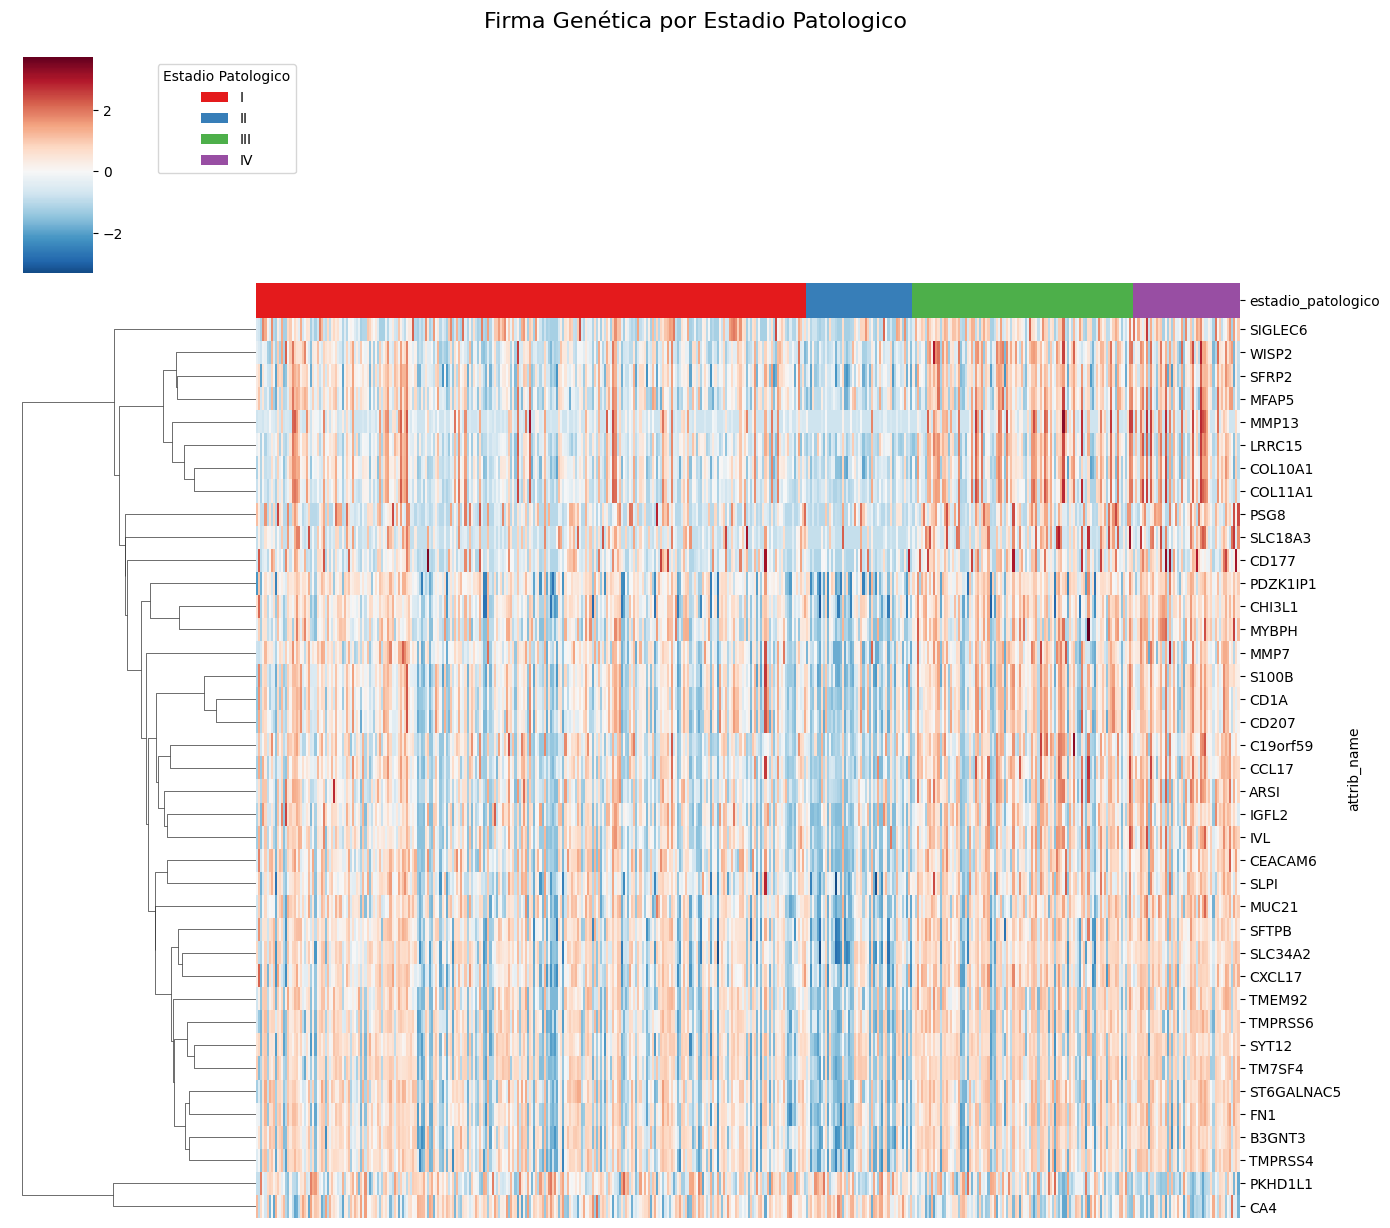

In [ ]:
# En función del estadio patológico (sin agrupar):
creacion_clustermap_expresion_genetica(df_combined, 'estadio_patologico')

c:\Users\mbarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


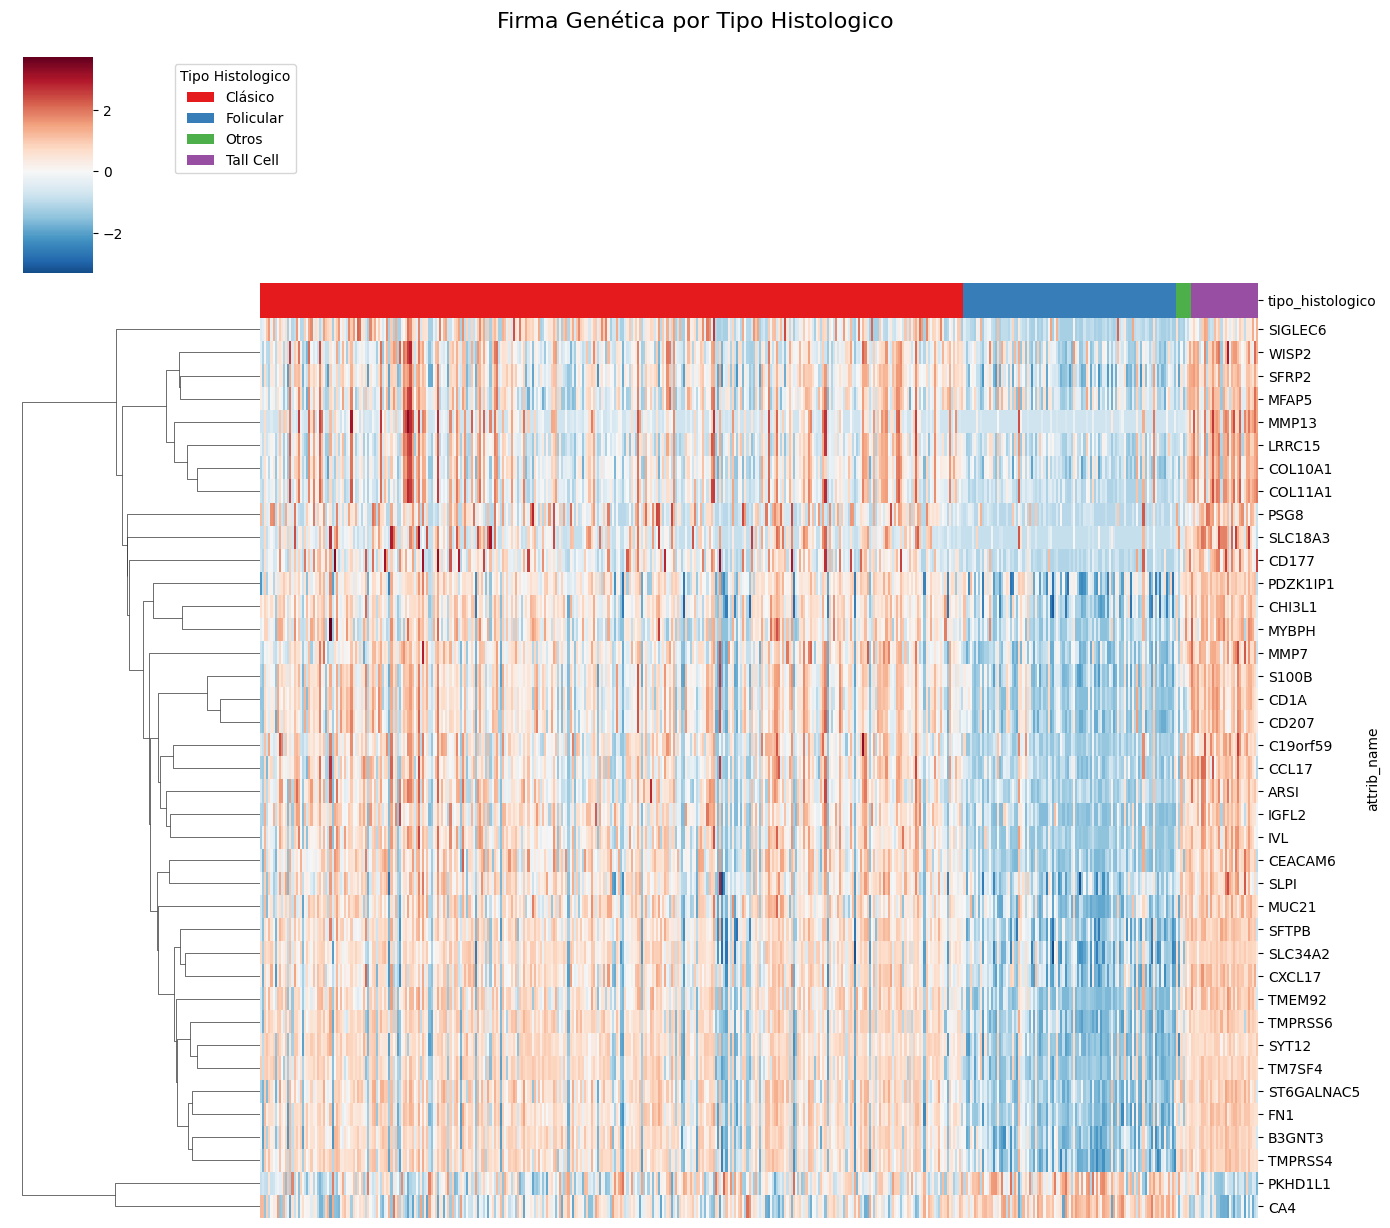

In [ ]:
# En función del tipo histológico:
creacion_clustermap_expresion_genetica(df_combined, 'tipo_histologico')

c:\Users\mbarr\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


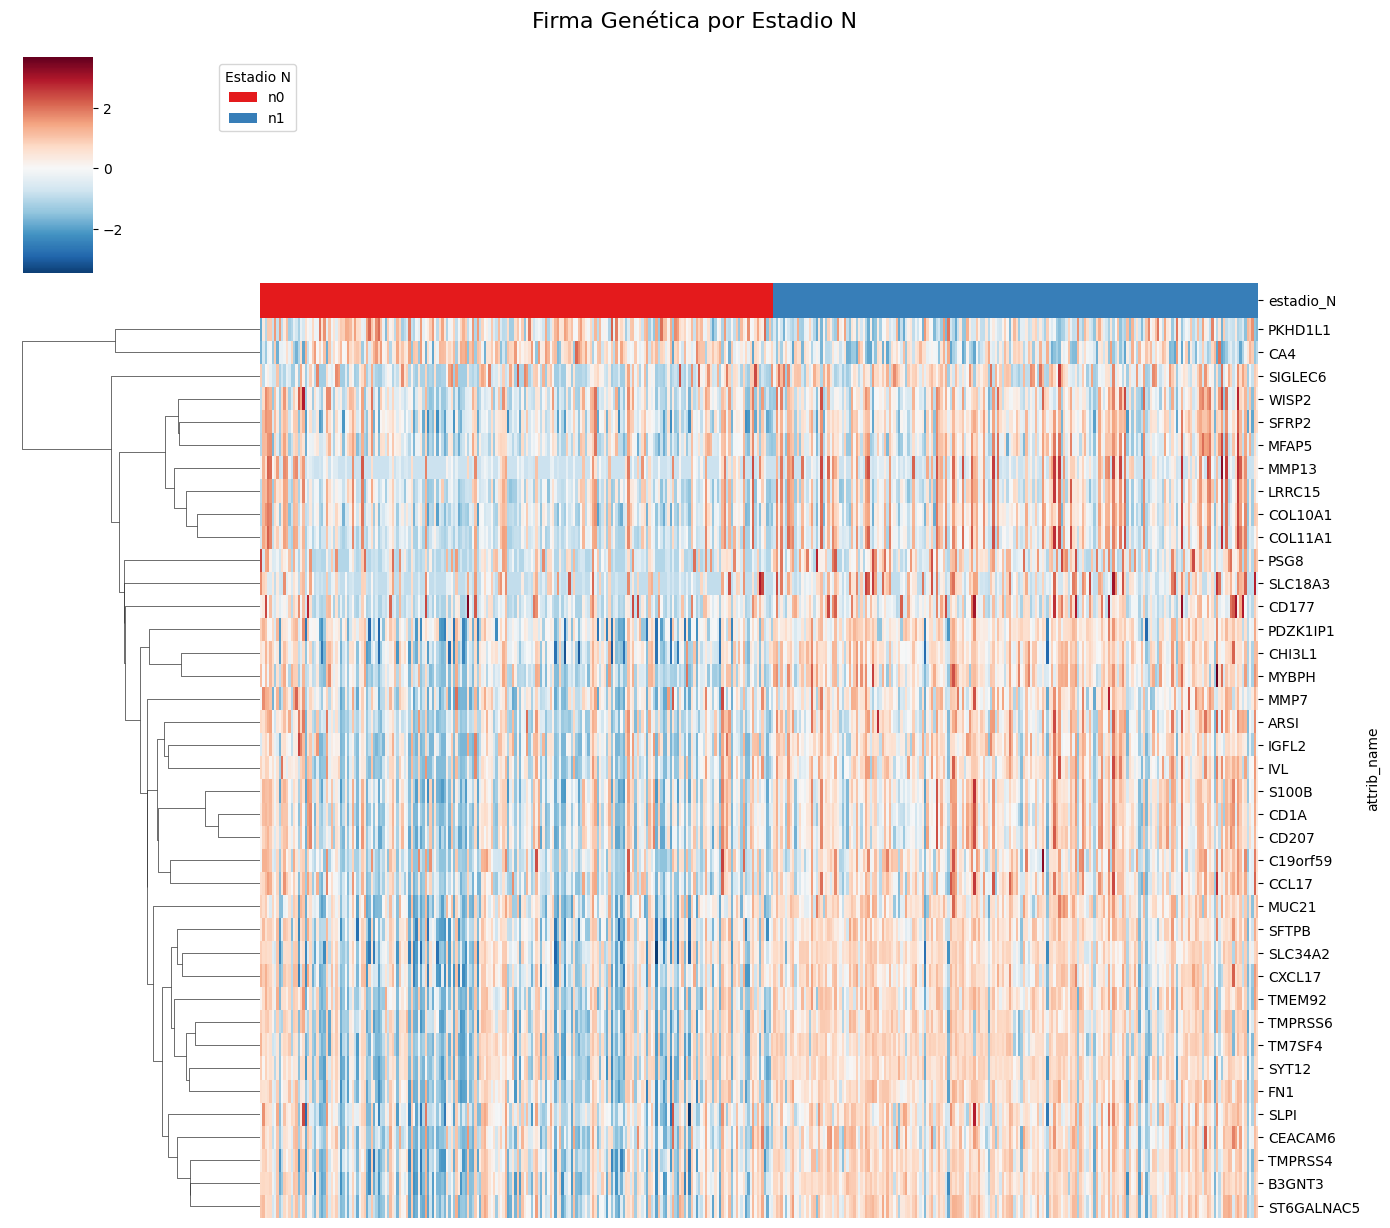

In [ ]:
creacion_clustermap_expresion_genetica(df_combined, 'estadio_N')

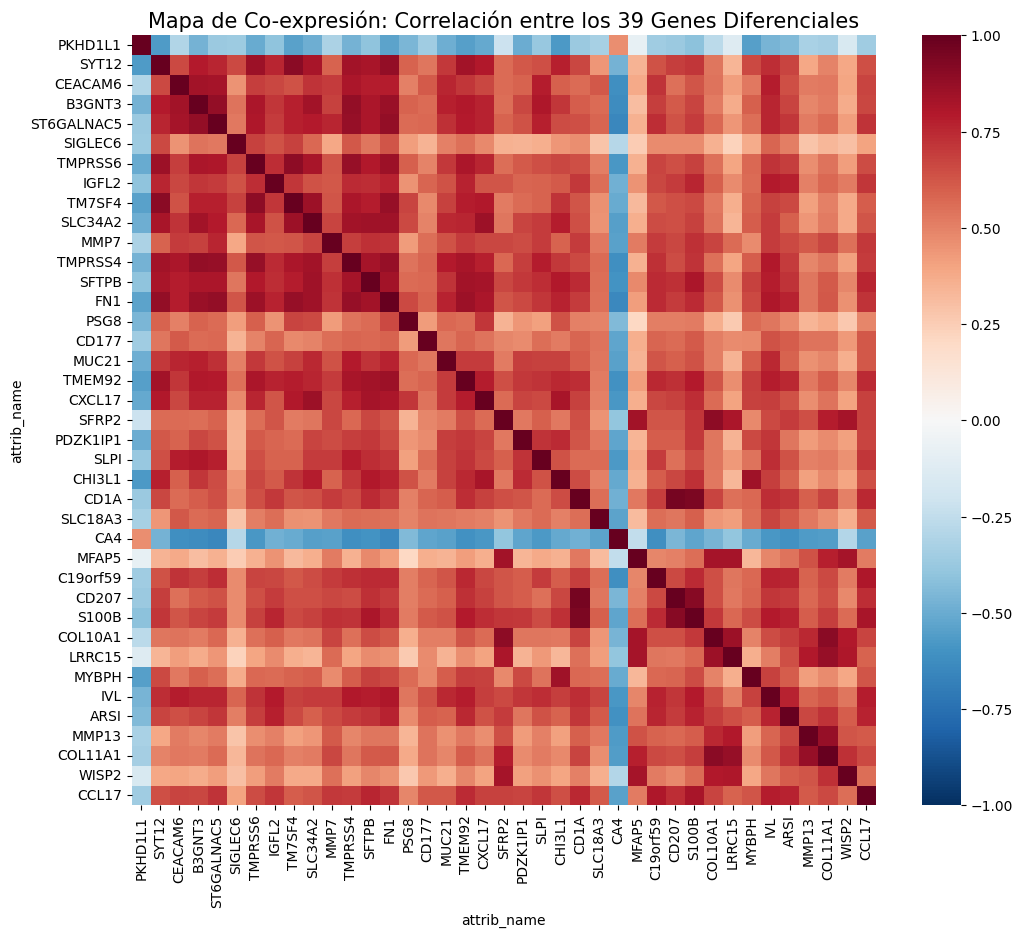

In [ ]:
matriz_corr_diferencial = df_rna[genes_significativos].corr()

# 3. Dibujar el Heatmap de Co-expresión
plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_corr_diferencial, 
    annot=False,          # False para que sea legible si hay muchos genes
    cmap='RdBu_r',        # Rojo para correlación positiva, Azul para negativa
    center=0,             # El blanco será correlación cero
    vmin=-1, vmax=1       # Rango estándar de correlación de Pearson
)

plt.title(f'Mapa de Co-expresión: Correlación entre los {len(genes_significativos)} Genes Diferenciales', fontsize=15)
plt.show()